#**Projeto MML e ADE**

### **Projeto realizado por:**

David Carvalho, nº2242131

Rui Filipe Parada, nº2211025


### **Resumo**
*O presente projeto aplica conceitos de Análise de Dados Exploratória (ADE) e Machine Learning (ML) para explorar e adaptar o dataset “bank_data”. Inicialmente, realizamos uma análise estatística dos dados, identificando padrões e relações entre as variáveis. Em seguida, tratamos valores ausentes, outliers e duplicações, além de remover colunas altamente correlacionadas. Para o modelo preditivo, processamos os dados e testamos nove algoritmos de classificação, avaliando o desempenho com métricas como accuracy, recall e F1-score. Utilizamos Cross Validation e GridSearch para otimização dos modelos e analisamos a importância das variáveis nos algoritmos baseados em árvores. Concluímos qual o modelo ideal para utilizar no projeto em questão.*


#**1. Imports bib**

In [ ]:
#Para correr o modelo XGBoost

!pip uninstall scikit-learn xgboost -y
!pip install scikit-learn==1.3.0 xgboost==1.7.6

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
import pandas as pd
from google.colab import files
from tabulate import tabulate
import io


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_selection import mutual_info_classif
from pandas.plotting import parallel_coordinates
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import SelectKBest, SelectFpr, f_regression, RFECV, SelectFromModel
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#**2. Leitura do dataset**

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['bank_data.csv']),sep=';')

Saving bank_data.csv to bank_data.csv


#**3. Análise de dados exploratória**

In [ ]:
print("\nForma do dataset:")
df.shape


Forma do dataset:


(41188, 21)

In [ ]:
print("\nTipos de dados do dataset:")
df.dtypes


Tipos de dados do dataset:


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# número de unknown p/ coluna
unknown_per_column = (df == 'unknown').sum()
print(unknown_per_column)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


# ***3.1 ---------Análise Univariada-----------***


Estatísticas descritivas das variáveis numéricas:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std

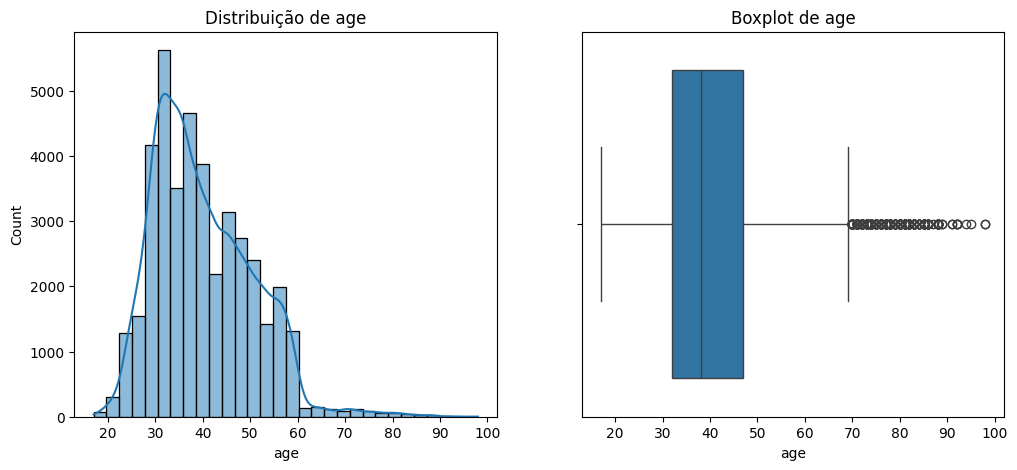

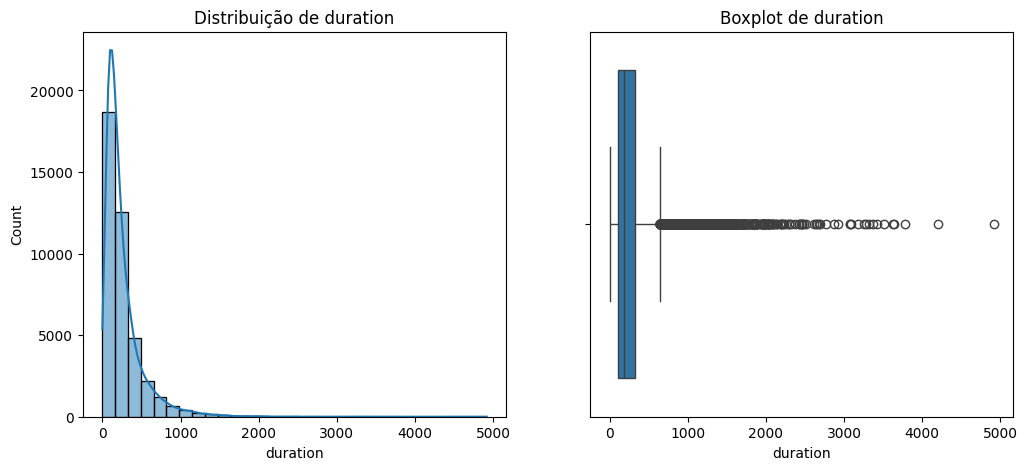

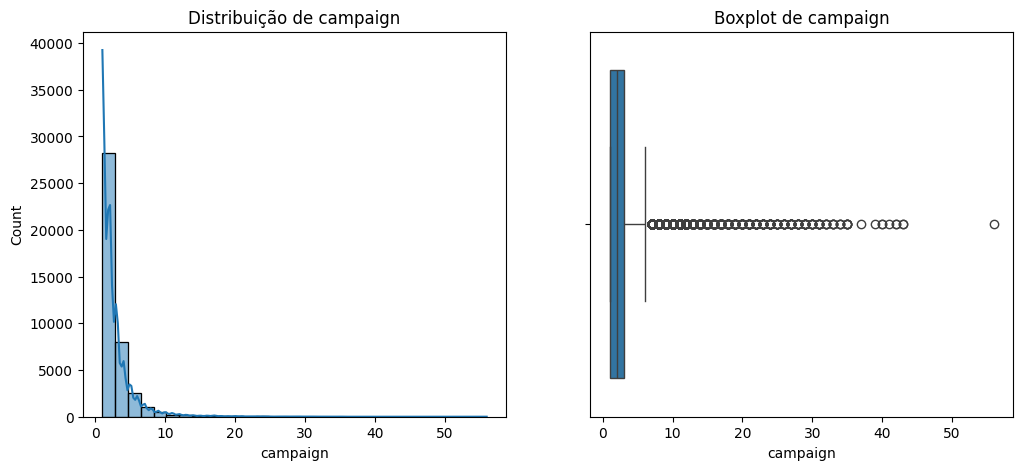

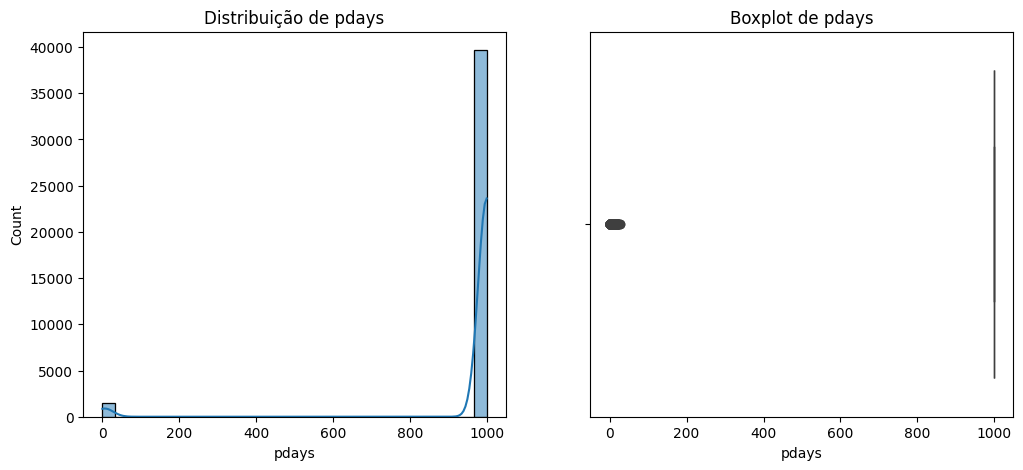

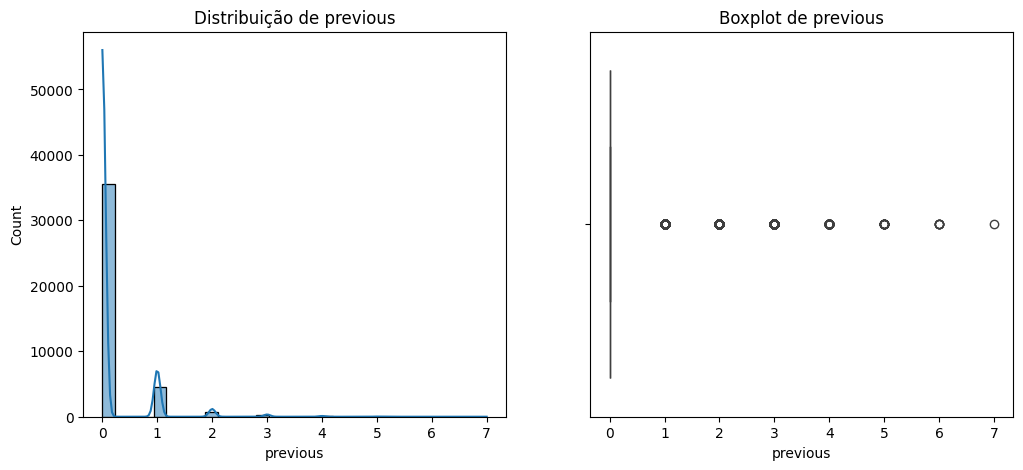

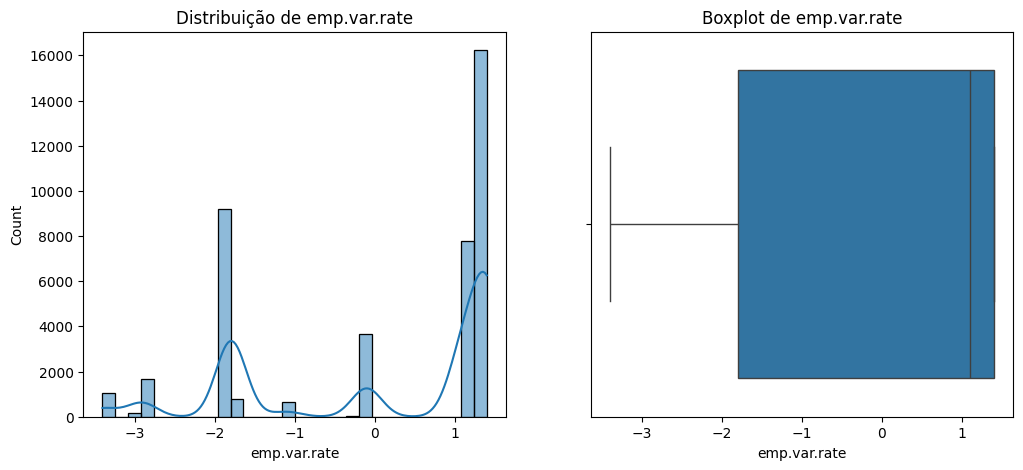

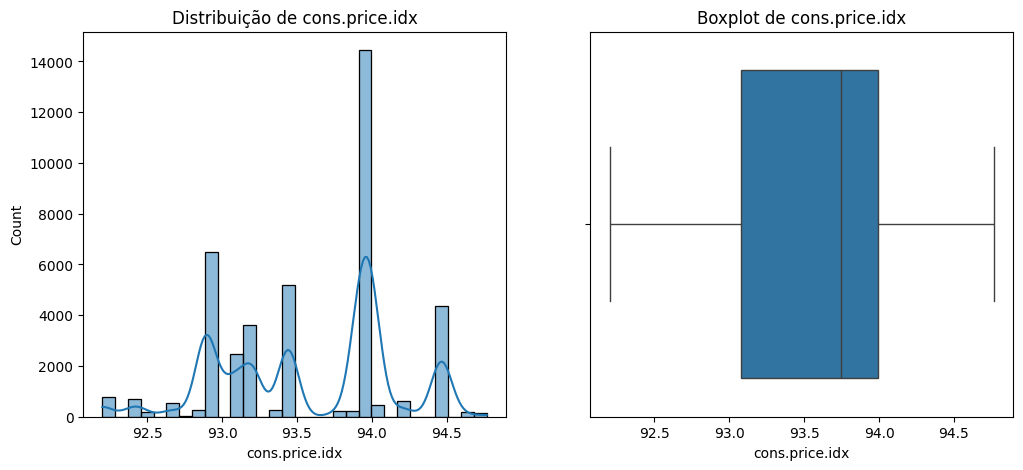

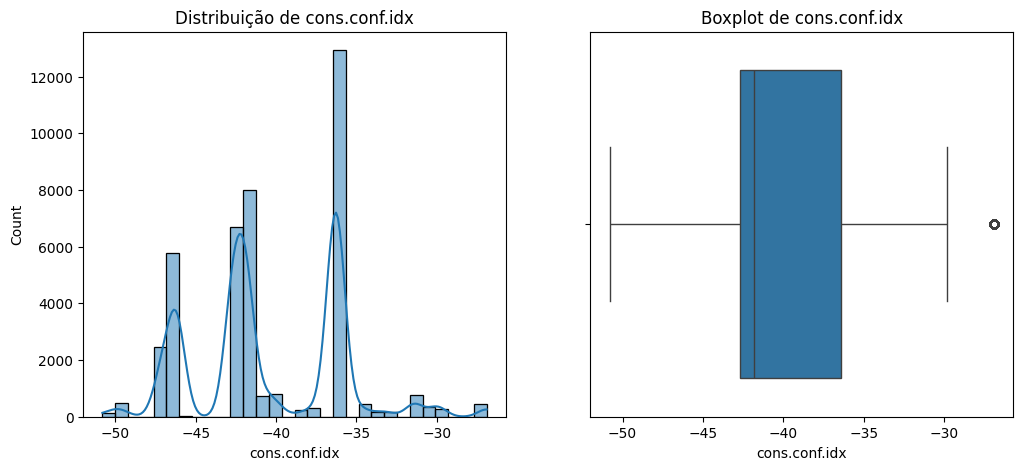

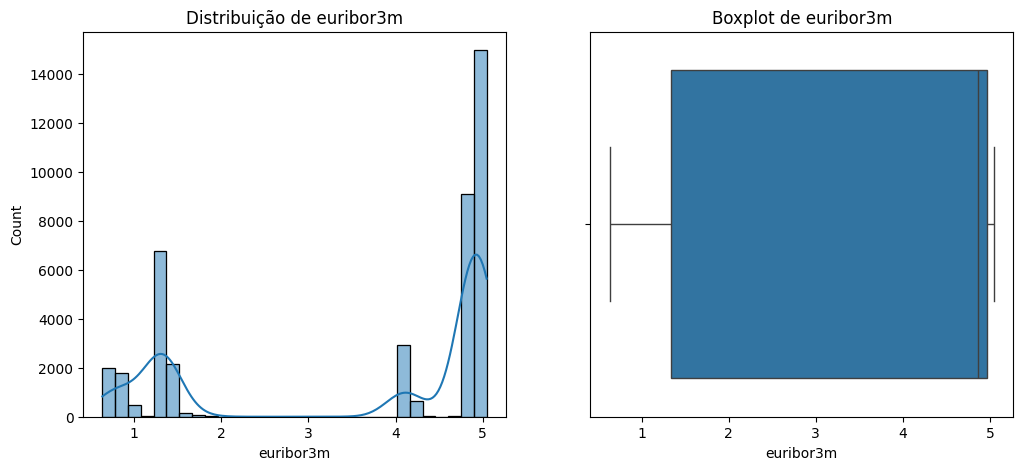

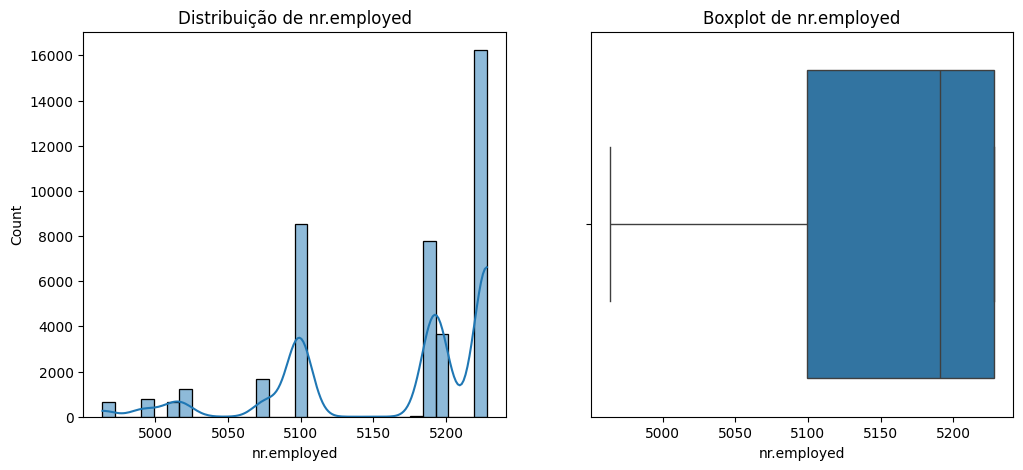

In [ ]:
### Separar colunas numéricas e categóricas

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns



### Estatísticas descritivas ###

print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())



### Visualizações Gráficas ###

# Gráficos para variáveis numéricas (Histograma e Boxplot)
print("\n----------------------------Gráficos para variáveis numéricas (Histograma e Boxplot): ---------------------------------------")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.show()



Contagem de valores únicos para Variáveis Categóricas: 

job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan:
loan
no         33950
yes         6248

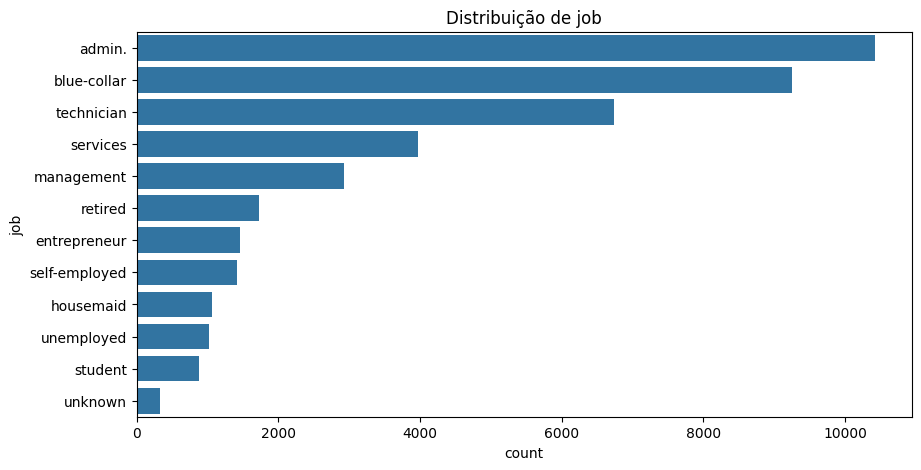

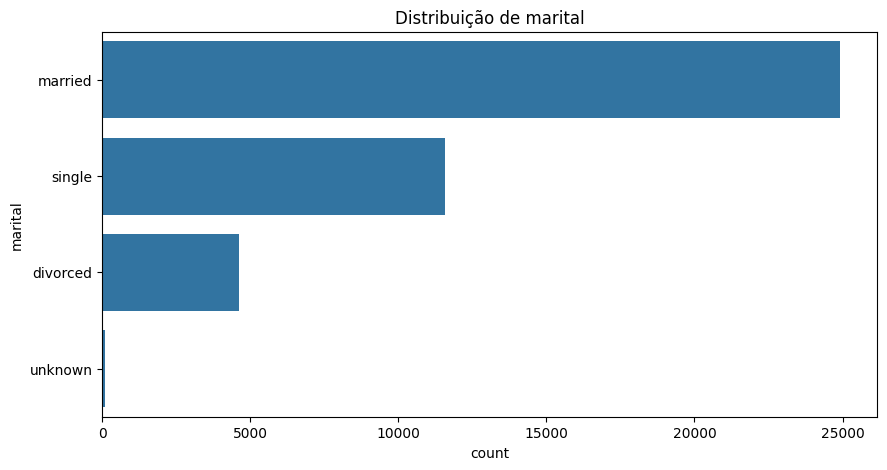

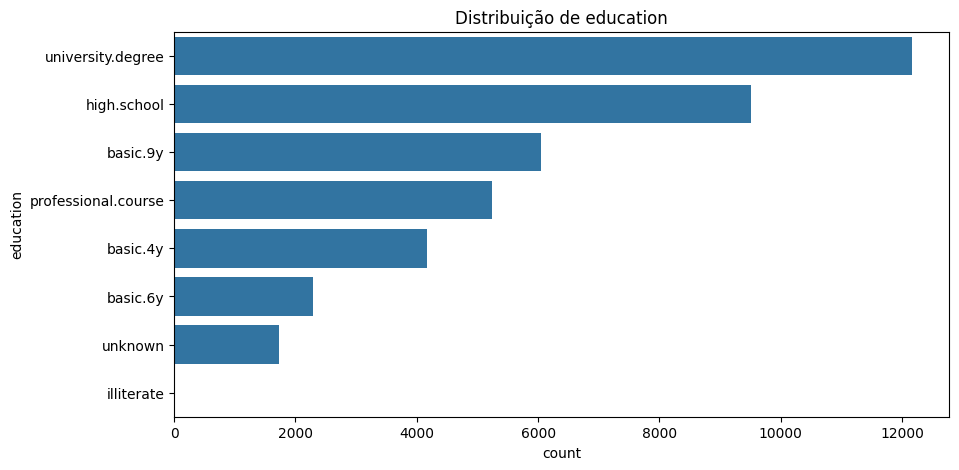

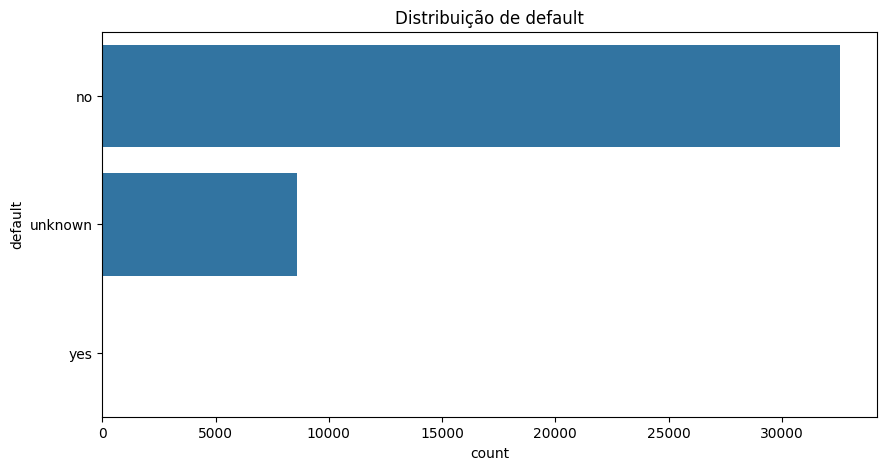

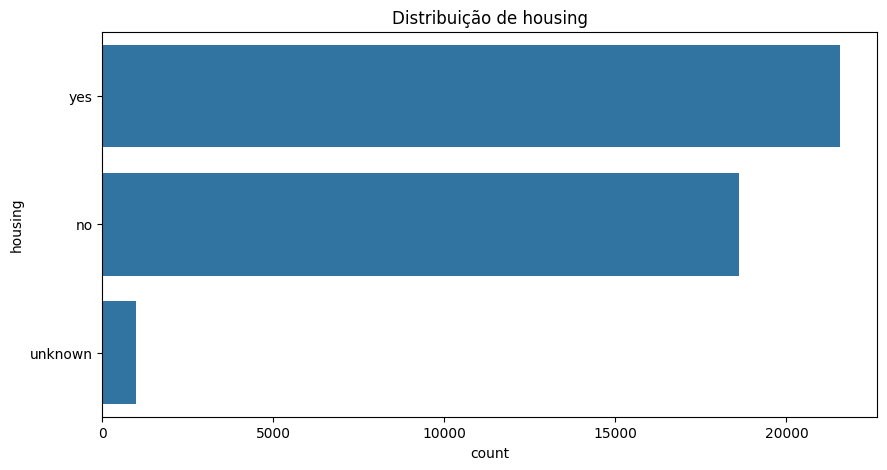

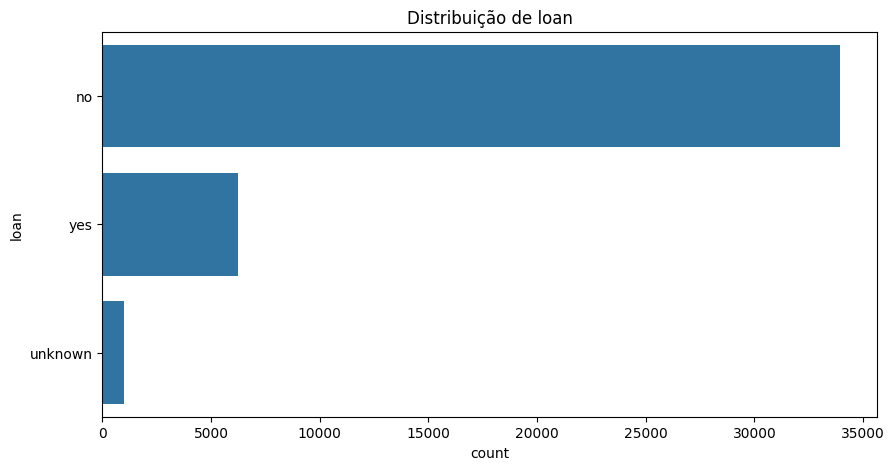

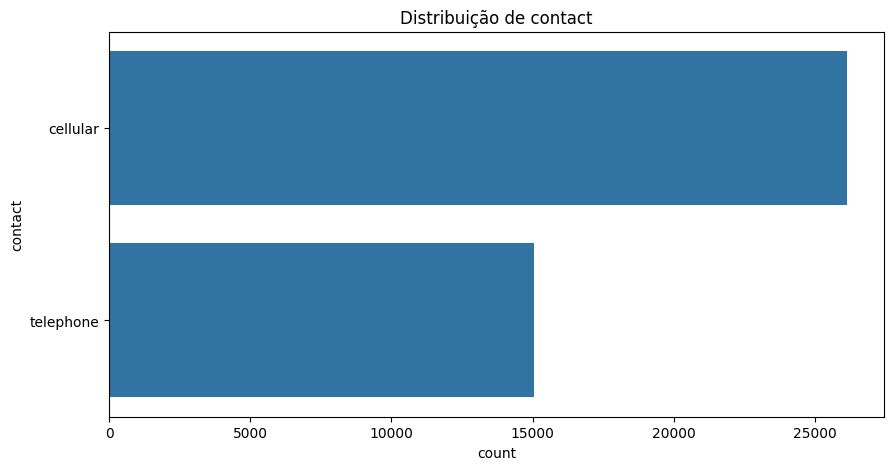

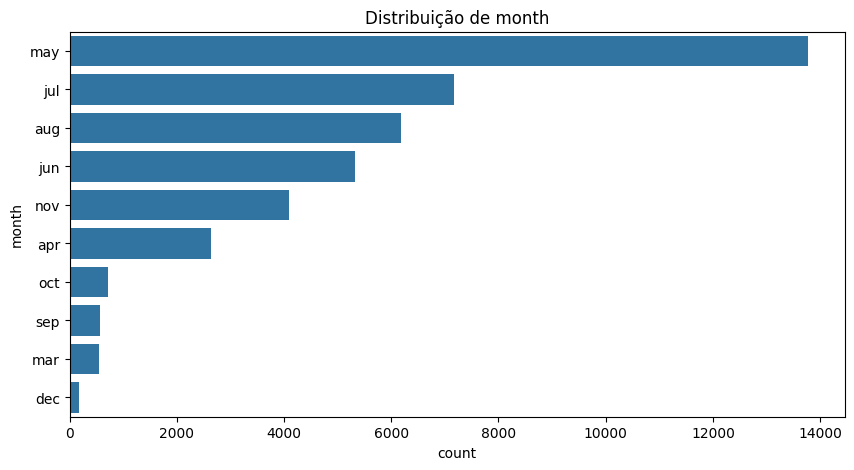

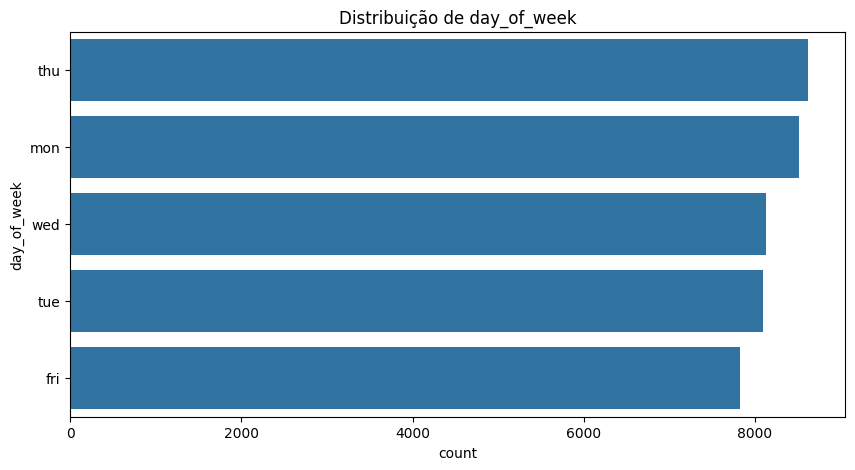

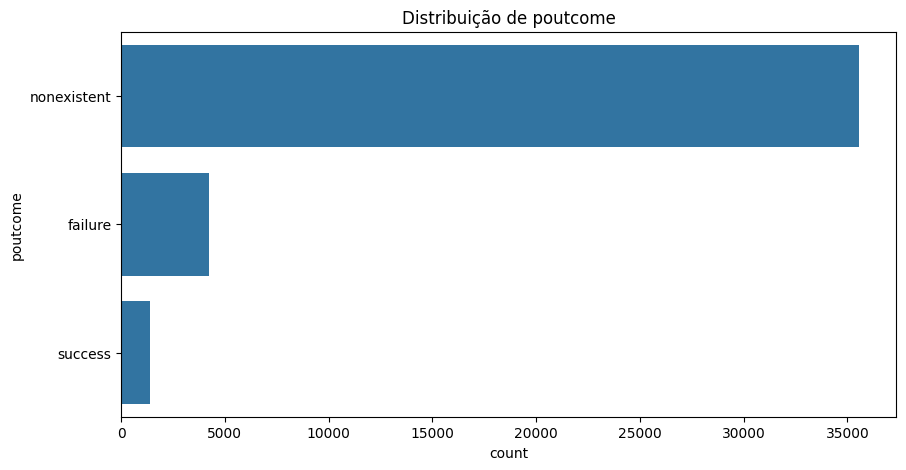

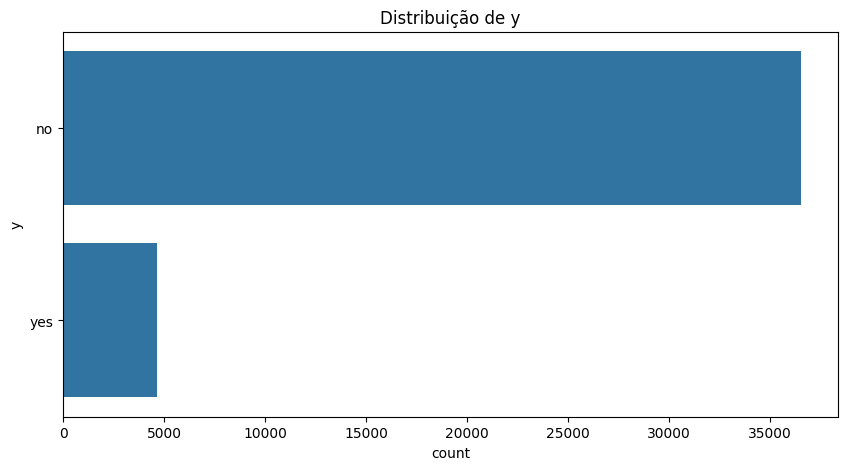

In [ ]:
### Estatísticas descritivas ###

# Estatísticas para variáveis categóricas
print("\nContagem de valores únicos para Variáveis Categóricas: ")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")



### Visualizações Gráficas ###

# Gráficos para variáveis categóricas (Barplot)
print("\n--------------------------Gráficos para variáveis categóricas (Barplot): --------------------------------------------------")
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')

    plt.show()


# ***3.2 ---------Análise Bivariada-----------***

***-------Relações Numérica - Numérica | Matriz de correlação - correlação de Spearman-------***

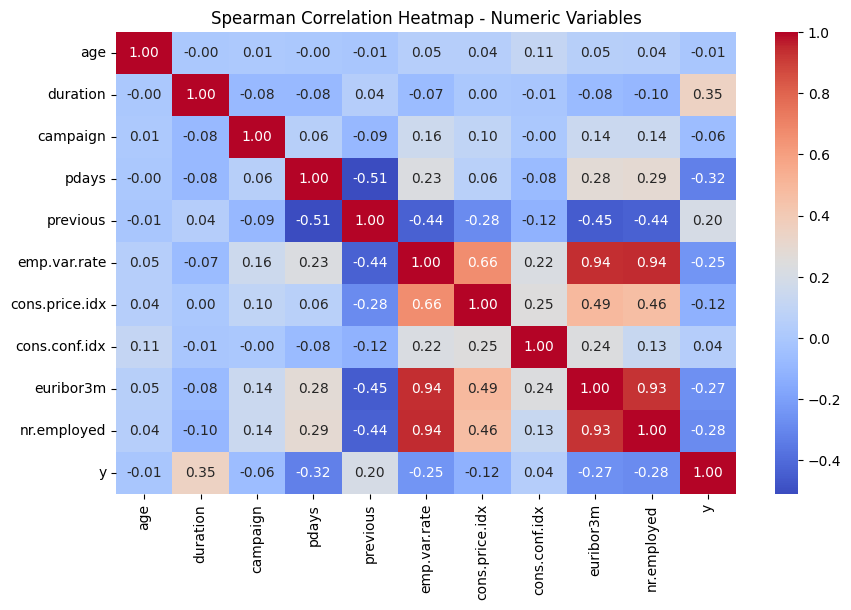

In [ ]:
# Selecionar apenas variáveis numéricas
df_num = df.select_dtypes(exclude=['category', 'object'])



# Calcular a matriz de correlação - correlação de Spearman
correlation_matrix_spearman = df_num.corr(method='spearman')



# Plt heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap - Numeric Variables")
plt.show()


***-------Relações Categórica - Categórica | Informação mútua-------***

In [ ]:
# Variáveis categóricas
cat_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']



# Função
def compute_mutual_info(df, cat_vars):
    mi_results = {}
    label_encoders = {}
    for var in cat_vars:
        label_encoders[var] = LabelEncoder()
        df[f'{var}_encoded'] = label_encoders[var].fit_transform(df[var])

    for var1 in cat_vars:
        for var2 in cat_vars:
            if var1 != var2:
                X = df[[f'{var1}_encoded']]
                y = df[f'{var2}_encoded']
                mi = mutual_info_classif(X, y)
                mi_results[(var1, var2)] = mi[0]
                print(f"Mutual Information between {var1} and {var2}: {mi[0]:.4f}")

    return mi_results



# Mutual Information
mi_results = compute_mutual_info(df, cat_vars)



Mutual Information between job and marital: 0.0519
Mutual Information between job and education: 0.4028
Mutual Information between job and housing: 0.0011
Mutual Information between job and loan: 0.0010
Mutual Information between job and contact: 0.0085
Mutual Information between job and month: 0.0529
Mutual Information between job and day_of_week: 0.0039
Mutual Information between job and poutcome: 0.0092
Mutual Information between job and y: 0.0089
Mutual Information between marital and job: 0.0540
Mutual Information between marital and education: 0.0287
Mutual Information between marital and housing: 0.0006
Mutual Information between marital and loan: 0.0022
Mutual Information between marital and contact: 0.0056
Mutual Information between marital and month: 0.0047
Mutual Information between marital and day_of_week: 0.0023
Mutual Information between marital and poutcome: 0.0063
Mutual Information between marital and y: 0.0051
Mutual Information between education and job: 0.4061
Mutua

***-------Relações Numérica - Categórica | Informação mútua-------***

Mutual Information entre age e y: 0.0169
Mutual Information entre duration e y: 0.0763
Mutual Information entre campaign e y: 0.0057
Mutual Information entre pdays e y: 0.0391
Mutual Information entre previous e y: 0.0184
Mutual Information entre emp.var.rate e y: 0.0566
Mutual Information entre cons.price.idx e y: 0.0679
Mutual Information entre cons.conf.idx e y: 0.0677
Mutual Information entre euribor3m e y: 0.0742
Mutual Information entre nr.employed e y: 0.0645


<ipython-input-22-f0512d7dc75f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Informação Mútua', y='Variável', data=mi_df1, palette='viridis')


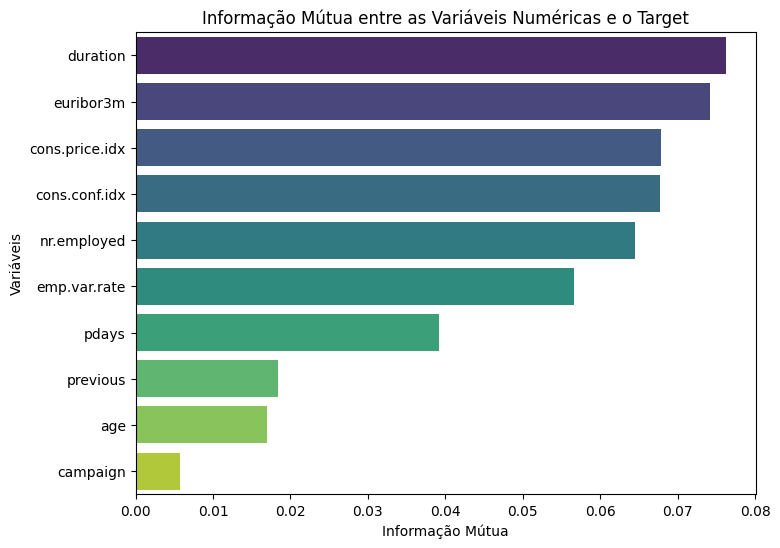

Variável  Informação Mútua
1        duration          0.076269
8       euribor3m          0.074151
6  cons.price.idx          0.067884
7   cons.conf.idx          0.067707
9     nr.employed          0.064467
5    emp.var.rate          0.056621
3           pdays          0.039146
4        previous          0.018425
0             age          0.016931
2        campaign          0.005717

In [ ]:
# Variáveis numéricas
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']



# Para nos certificarmos que 'y' está no dataframe
if 'y' not in df.columns:
    raise ValueError("A coluna 'y' não foi encontrada no dataset.")



# Converter 'y' para binário (0 = 'no', 1 = 'yes')
df1 = df.copy()
df1['y'] = df['y'].map({'no': 0, 'yes': 1})



# Filtrar apenas as colunas numéricas presentes no dataframe
num_vars = [var for var in num_vars if var in df.columns]



# Função para calcular a Mutual Info entre variáveis numéricas e 'y'
def compute_mutual_info(df, num_vars, target):
    mi_results = {}

    for var in num_vars:
        X = df1[[var]].copy()
        y = df1[target]
        mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)

        mi_results[var] = mi[0]
        print(f"Mutual Information entre {var} e {target}: {mi[0]:.4f}")

    return mi_results



# Mutual Information
mi_results = compute_mutual_info(df1, num_vars, 'y')



# Criar DataFrame corretamente
mi_df1 = pd.DataFrame(list(mi_results.items()), columns=['Variável', 'Informação Mútua'])



# Remover possíveis valores NaN                                                 -> o tratamento no df é feito abaixo, no ponto 4 do projeto
mi_df1.dropna(inplace=True)



# Ordenar os valores de maior para menor
mi_df1.sort_values(by='Informação Mútua', ascending=False, inplace=True)



# Plt Mutual Info
plt.figure(figsize=(8, 6))
sns.barplot(x='Informação Mútua', y='Variável', data=mi_df1, palette='viridis')
plt.title('Informação Mútua entre as Variáveis Numéricas e o Target')
plt.xlabel('Informação Mútua')
plt.ylabel('Variáveis')
plt.show()



# Mostrar a tabela corrigida
mi_df1


# ***3.3 ---------Análise Multivariada-----------***




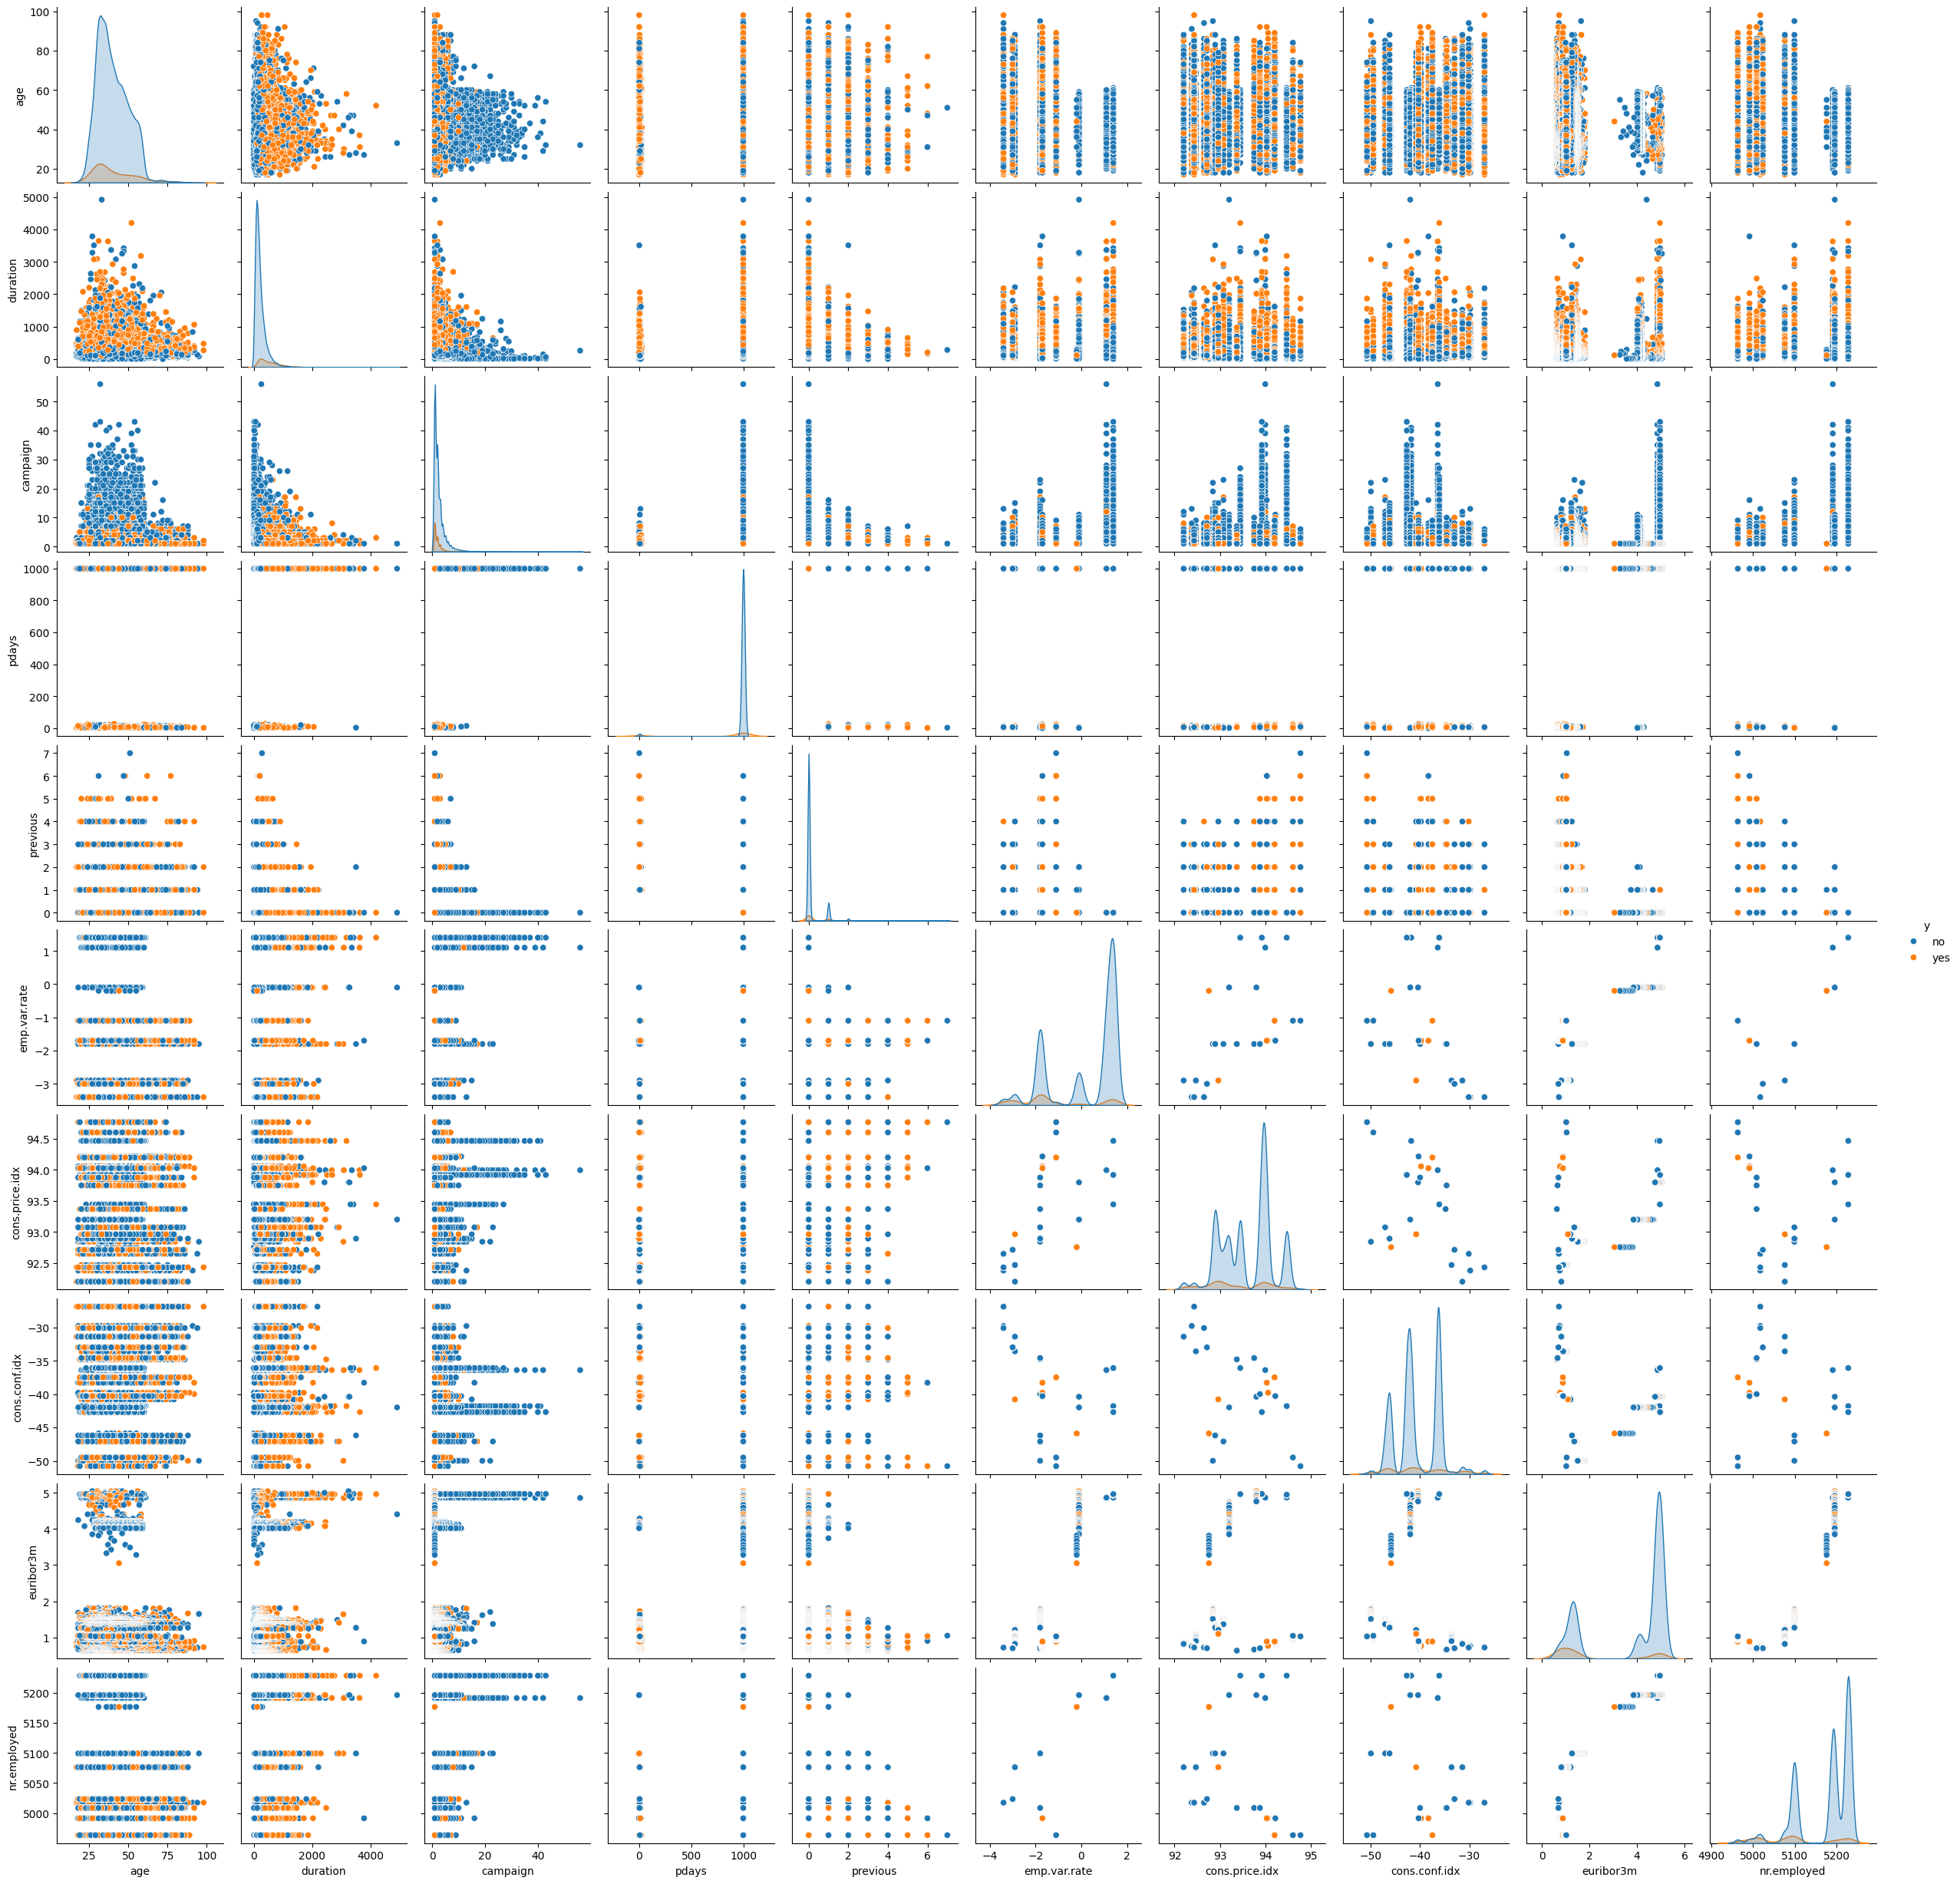

In [ ]:
# Visualizar as relações entre as categorias, através do parâmetro hue('y')     -> que é o nosso target (ver legenda à direita do pairplot)

sns.pairplot(df, hue='y')
plt.show()


#**4. Tratamento dos dados - missing values, outliers e duplicados | DF_TESTE1**

In [ ]:
# df_teste1 -> cópia de df para não alterarmos o dataset original

df_teste1 = df.copy()





# Replace das etiquetas "unknown" (que representam missing values) por np.nan, para poder usar o dropna e o fillna

df_teste1.replace('unknown', np.nan, inplace=True)





# Tratamento de missing values -> apagar linhas com valores unkown | substituição de valores unkown | drop da coluna "default" e da coluna "poutcome"

### dropna

df_teste1.dropna(subset=["job"], inplace=True)                                  ### linhas job apagadas pois não representavam muito para a análise

df_teste1.dropna(subset=["marital"], inplace=True)                              ### linhas marital apagadas pois não representavam muito para a análise

df_teste1.dropna(subset=["housing"], inplace=True)
                                                                                ### falado com prof -> conclusao: sao só 2,5% dos dados por isso serão apagados | é melhor do que supor!
df_teste1.dropna(subset=["loan"], inplace=True)



### fillna

df_teste1['education'] = df_teste1['education'].fillna(df_teste1['education'].mode().iloc[0])            ### linhas education substituídas pela moda



### drop da coluna inteira

df_teste1.drop(columns=["default"], inplace=True)                               ### linhas default apagadas pois não representavam muito para a análise (apenas 3 yes)

df_teste1.drop(columns=["poutcome"], inplace=True)                              ### linhas poutcome apagadas pois não representam nada para a análise (pq só temos 5000 registos )

df_teste1.drop(columns=["pdays"], inplace=True)

df_teste1.drop(columns=["nr.employed"], inplace=True)                           ### coluna apagada devido à alta correlação com "euribor3m"

df_teste1.drop(columns=["emp.var.rate"], inplace=True)                          ### coluna apagada devido à alta correlação com "euribor3m"

##### pensamos em eliminar a coluna "previous", mas decidimos mantê-la porque os valores vistos no boxplot não são outliers #####





# Tratamento de outliers

##### age -> decidimos NÃO apagar devido a poder acontecer, embora seja raro, o contacto com pessoas acima de 70 anos para aderir ao crédito #####

##### duration (representam 2,5% do total de dados) -> decidimos NÃO apagar (comentário a explicar)

df_teste1 = df_teste1[df_teste1['campaign'] <= 9]                               ### linhas campaign apagadas pois (ver comentário)






# Tratamento de duplicados

df_teste1 = df_teste1.drop_duplicates()





# Shape e colunas com valores a modificar -> não alterar

print(f"shape antes:{df.shape}")

print(f"shape depois:{df_teste1.shape}")

print(f"Número de NaN:{df_teste1.isnull().sum()}")



shape antes:(41188, 21)
shape depois:(38738, 16)
Número de NaN:age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64


#**5. Processamento de dados e defs para o modelo preditivo**

***-------Process Data | Split Data | Apply Model | Model Evaluation | Variables Importance-------***

In [ ]:
# Processamento dos dados

def process_data(X, y, num_vars, cat_vars):
    scaler = StandardScaler()
    enc = OneHotEncoder(sparse_output=False)
    le = LabelEncoder()

    X["age_disc"] = pd.cut(
        X["age"],
        bins=[0, 18, 35, 49, 64, float('inf')],
        labels=["0-18", "19-35", "36-49", "50-64", "65+"]
    )

    X = X.drop(columns=["age"])
    num_vars = [var for var in num_vars if var != "age"]
    cat_vars = cat_vars + ["age_disc"]

    X_num = scaler.fit_transform(X[num_vars])
    X_cat = enc.fit_transform(X[cat_vars])
    X_processed = np.concatenate([X_num, X_cat], axis=1)

    new_names = num_vars + list(enc.get_feature_names_out(cat_vars))

    y_encoded = le.fit_transform(y)

    return X_processed, new_names, y_encoded





# Separação para treino e teste

def split_data(X, y, test_portion):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion)

  return X_train, X_test, y_train, y_test





# Função de apply model

problem_type = 'classification'

def apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test):
  if 'KNN' == algorithm:
    param_grid = {'n_neighbors': np.arange(10, 30 , 2)}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
  elif 'logistic_regression' == algorithm:
    param_grid = {'C': [0.05, 0.1, 0.2, 0.3]}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=10)
  elif 'linear_SVC' == algorithm:
    param_grid = {'C': [1.0, 5.0, 10.0]}
    grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
  elif 'rbf_SVC'== algorithm:
    param_grid = {'C': [0.05, 0.1, 0.2, 0.3],
                  'gamma': [0.01, 0.05, 0.1]}
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
  elif 'DT' == algorithm:
      param_grid = {'max_depth': range(2, 7), 'max_leaf_nodes': range(2, 11), 'criterion': ['gini', 'entropy']}
      grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10).fit(X_train, y_train)
  elif 'RF' == algorithm:
      param_grid = {'max_depth': np.arange(2, 7), 'max_leaf_nodes': np.arange(2, 11), 'n_estimators': [100, 300, 500]}
      grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10).fit(X_train, y_train)
  elif 'GB' == algorithm:
    param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
    grid = GridSearchCV(GradientBoostingClassifier(n_estimators=100), param_grid, cv=10).fit(X_train, y_train)
  elif 'xgboost' == algorithm:
    param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
    grid = GridSearchCV(XGBClassifier(n_estimators=100), param_grid, cv=10).fit(X_train, y_train)
  elif 'lightgbm' == algorithm:
    param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
    params = {'n_estimators': 100,
            'verbose': -1,
            'importance_type': 'gain'
        }
    grid = GridSearchCV(LGBMClassifier(**params), param_grid, cv=10).fit(X_train, y_train)
  else:
    print('Escolha um modelo de classificação válido.')


  if 'linear_regression' != algorithm:
    grid.fit(X_train, y_train)
    print(f'Best mean cross-validation score: {grid.best_score_}')
    print(f'Best parameters: {grid.best_params_}')
    # Guardar o modelo com melhores parametros
    best_model = grid.best_estimator_
  else:
    best_model = model
    best_model.fit(X_train, y_train)

  y_pred_train = best_model.predict(X_train)
  y_pred_test = best_model.predict(X_test)
  print('Training error')
  model_evaluation(y_train, y_pred_train)
  print('Test error')
  model_evaluation(y_test, y_pred_test)

  return best_model





# Avaliação da performance do modelo


def model_evaluation(y_true, y_pred):
  labels = np.unique(y_true)
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot()

  # O classification report mostra as métricas accuracy, precision, recall e f1-score (ver abaixo quando chamamos cada modelo)
  print(classification_report(y_true, y_pred))






# Verificar a importância de cada variável


def variables_importance(model, variables, algorithm, original_columns):
    if algorithm in ['DT', 'RF', 'GB', 'xgboost', 'lightgbm']:
        importance = model.feature_importances_
    else:
        importance = model.coef_

    if len(importance) == 1:
        importance = importance[0]

    importance_dict = {col: 0 for col in original_columns}

    # Somar a importância das variáveis que pertenciam à mesma coluna original
    for var, imp in zip(variables, importance):
        for orig_col in original_columns:
            if var.startswith(orig_col):
                importance_dict[orig_col] += imp
                break

    importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Variável', 'Importância'])

    importance_df['Importância'] = importance_df['Importância'] / importance_df['Importância'].max()

    importance_df = importance_df.sort_values(by='Importância', ascending=True)

    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Variável'], importance_df['Importância'], color="orange")
    plt.xlabel("Importância Normalizada (0 a 1)")
    plt.ylabel("Variável")
    plt.title("Importância das Variáveis (Normalizada)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



***-------Preparação dos dados-------***

In [ ]:
# Definição das vars para a preparação

target = 'y'
independent_vars = df_teste1.columns.difference([target])

num_vars_prep = ['duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
cat_vars_prep = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'age_disc']


In [ ]:
# Criar df_teste2 com 10% dos dados de df_teste1

# Escolha da percentagem de dados a usar (100% dos dados ou 10% dos dados)      -> APENAS CORRER QUANDO QUISERMOS MUDAR O DF

df_teste2 = df_teste1.sample(frac=1.0, random_state=42)


In [ ]:
# Definir X e y

X, y = df_teste2[independent_vars], df_teste2[target]

In [ ]:
# Preparação dos dados para treino e teste | DF_TESTE1                          -> SÓ CORRER UMA VEZ

X, new_names, y_encoded = process_data(X, y, num_vars_prep, cat_vars_prep)

X_train, X_test, y_train, y_test = split_data(X, y_encoded, 0.2)

original_columns = num_vars_prep + cat_vars_prep                                ### para chamar o gráfico de importância das variáveis abaixo


#**6. Modelos preditivos**

#***6.1 ---------Modelos testados com 10% dos dados-----------***

Best mean cross-validation score: 0.894162229877858
Best parameters: {'n_neighbors': 24}
Training error
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2723
           1       0.70      0.30      0.42       376

    accuracy                           0.90      3099
   macro avg       0.81      0.64      0.68      3099
weighted avg       0.88      0.90      0.88      3099

Test error
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       676
           1       0.59      0.27      0.37        99

    accuracy                           0.88       775
   macro avg       0.74      0.62      0.65       775
weighted avg       0.86      0.88      0.86       775



KNeighborsClassifier(n_neighbors=24)

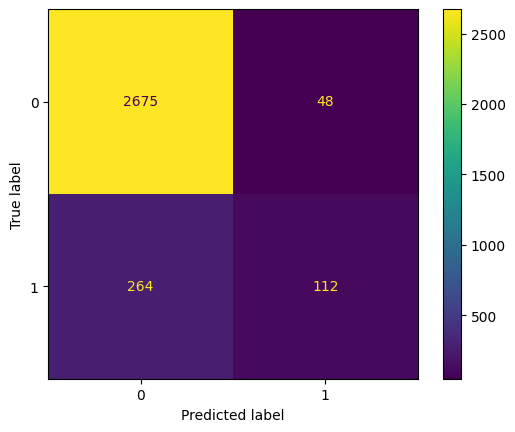

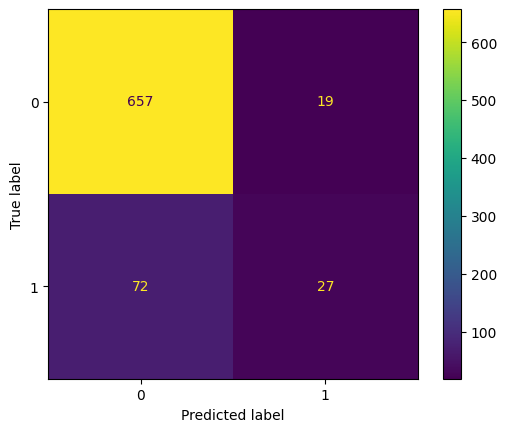

In [ ]:
algorithm = 'KNN'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

Best mean cross-validation score: 0.8964171625430628
Best parameters: {'C': 0.1}
Training error
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2723
           1       0.66      0.39      0.49       376

    accuracy                           0.90      3099
   macro avg       0.79      0.68      0.72      3099
weighted avg       0.89      0.90      0.89      3099

Test error
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       676
           1       0.74      0.46      0.57        99

    accuracy                           0.91       775
   macro avg       0.83      0.72      0.76       775
weighted avg       0.90      0.91      0.90       775



LogisticRegression(C=0.1)

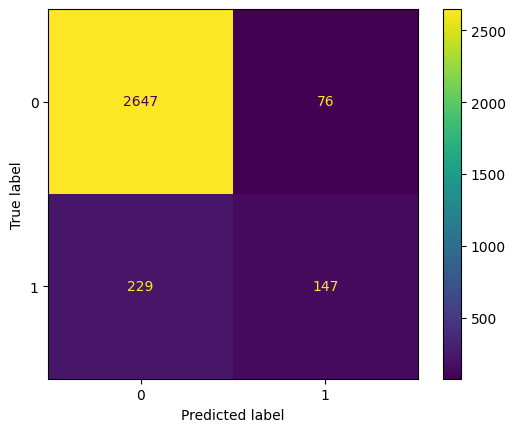

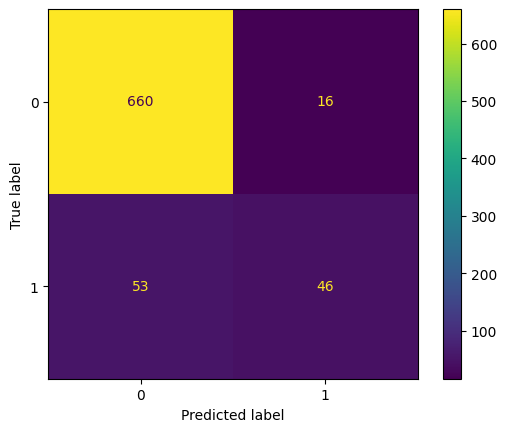

In [ ]:
algorithm = 'logistic_regression'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)


Best mean cross-validation score: 0.895450464557887
Best parameters: {'C': 10.0}
Training error
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2723
           1       0.66      0.34      0.45       376

    accuracy                           0.90      3099
   macro avg       0.79      0.66      0.70      3099
weighted avg       0.88      0.90      0.88      3099

Test error
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       676
           1       0.66      0.38      0.48        99

    accuracy                           0.90       775
   macro avg       0.79      0.68      0.71       775
weighted avg       0.88      0.90      0.88       775



SVC(C=10.0, kernel='linear')

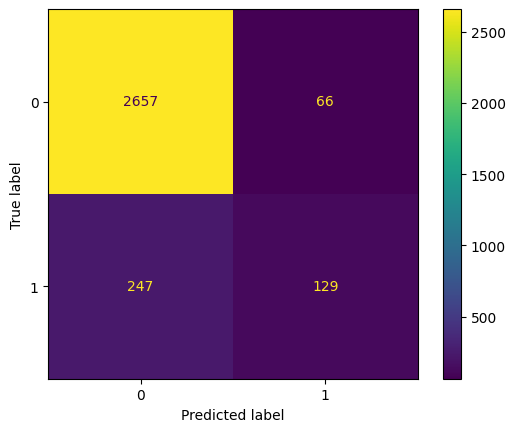

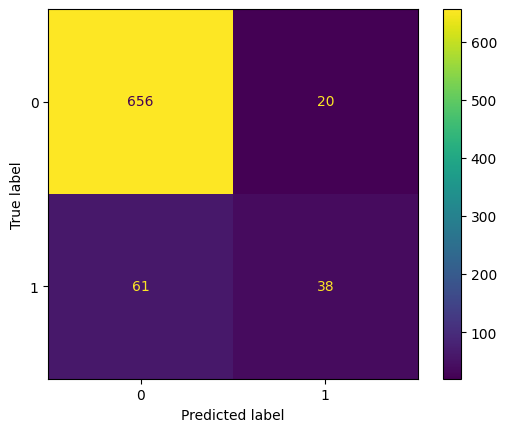

In [ ]:
algorithm = 'linear_SVC'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)


Best mean cross-validation score: 0.8928677314959808
Best parameters: {'C': 1.0, 'gamma': 0.01}
Training error
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2723
           1       0.71      0.26      0.38       376

    accuracy                           0.90      3099
   macro avg       0.81      0.62      0.66      3099
weighted avg       0.88      0.90      0.88      3099

Test error
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       676
           1       0.66      0.29      0.41        99

    accuracy                           0.89       775
   macro avg       0.78      0.64      0.67       775
weighted avg       0.87      0.89      0.87       775



SVC(gamma=0.01)

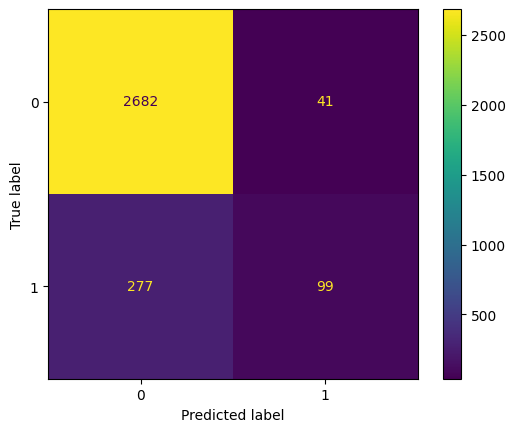

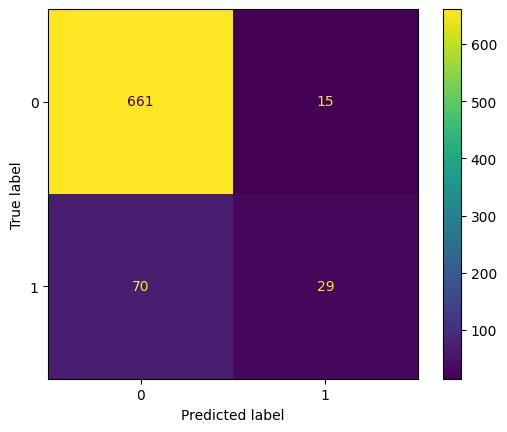

In [ ]:
algorithm = 'rbf_SVC'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)


Best mean cross-validation score: 0.9054483766572711
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 7}
Training error
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2723
           1       0.63      0.66      0.65       376

    accuracy                           0.91      3099
   macro avg       0.79      0.80      0.80      3099
weighted avg       0.91      0.91      0.91      3099

Test error
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       676
           1       0.60      0.65      0.62        99

    accuracy                           0.90       775
   macro avg       0.78      0.79      0.78       775
weighted avg       0.90      0.90      0.90       775



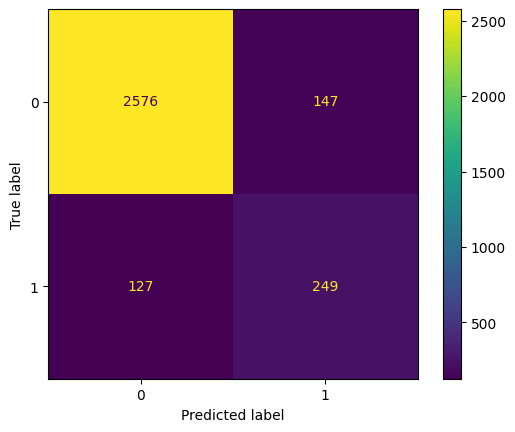

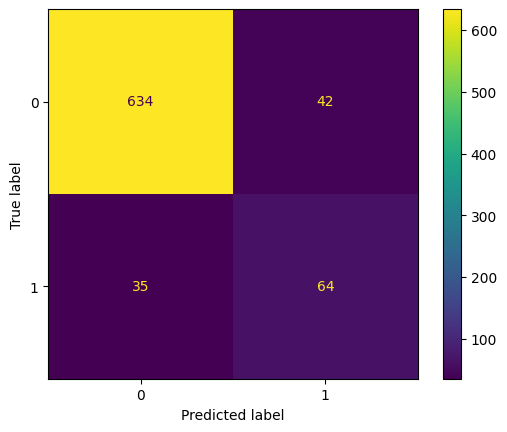

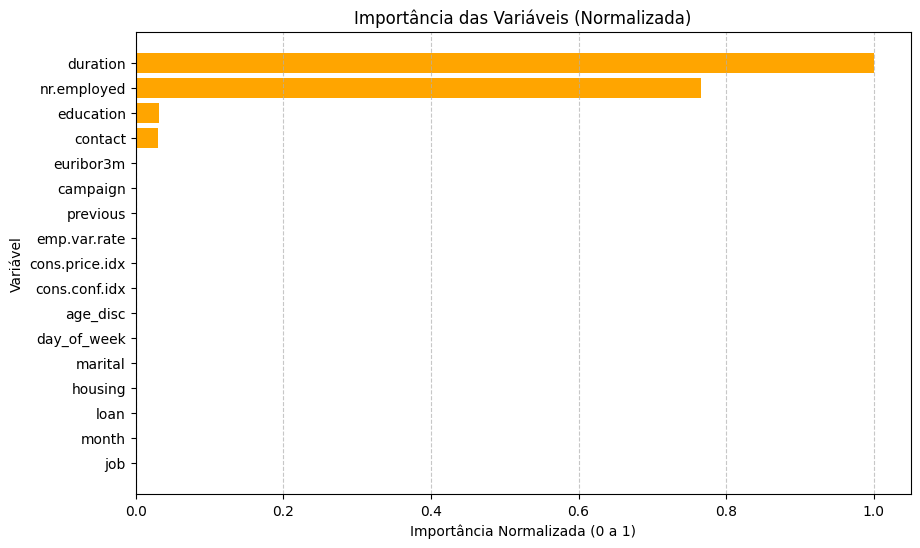

In [ ]:
algorithm = 'DT'

dt_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(dt_model, new_names, algorithm, original_columns)


Best mean cross-validation score: 0.8809322476250131
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 6, 'n_estimators': 300}
Training error
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2723
           1       0.89      0.05      0.09       376

    accuracy                           0.88      3099
   macro avg       0.89      0.52      0.51      3099
weighted avg       0.88      0.88      0.83      3099

Test error
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       676
           1       1.00      0.01      0.02        99

    accuracy                           0.87       775
   macro avg       0.94      0.51      0.48       775
weighted avg       0.89      0.87      0.82       775



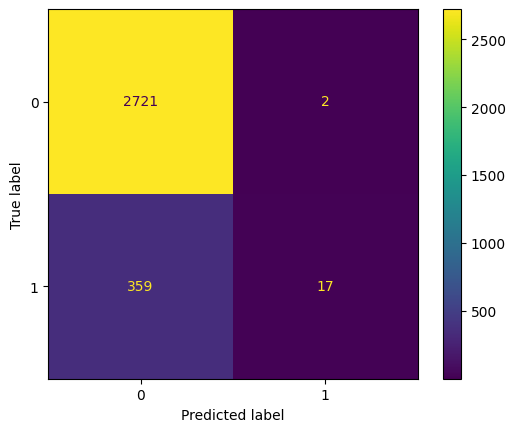

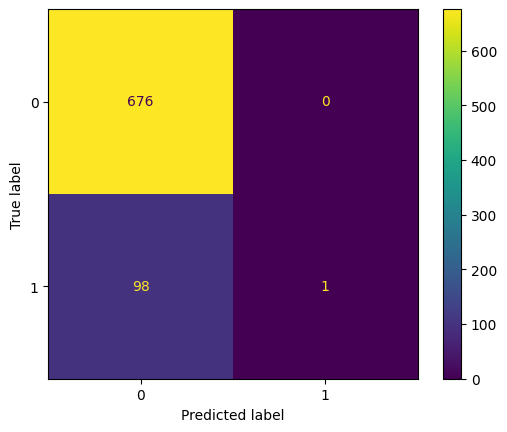

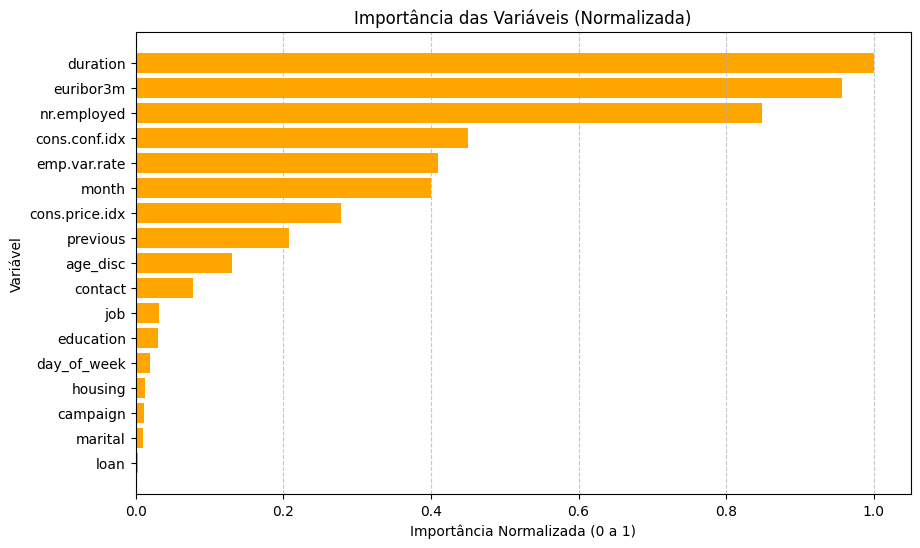

In [ ]:
algorithm = 'RF'

rf_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(rf_model, new_names, algorithm, original_columns)


Best mean cross-validation score: 0.9019072972126526
Best parameters: {'learning_rate': 0.05, 'max_depth': 4}
Training error
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2723
           1       0.83      0.69      0.75       376

    accuracy                           0.94      3099
   macro avg       0.89      0.83      0.86      3099
weighted avg       0.94      0.94      0.94      3099

Test error
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       676
           1       0.66      0.59      0.62        99

    accuracy                           0.91       775
   macro avg       0.80      0.77      0.78       775
weighted avg       0.90      0.91      0.91       775



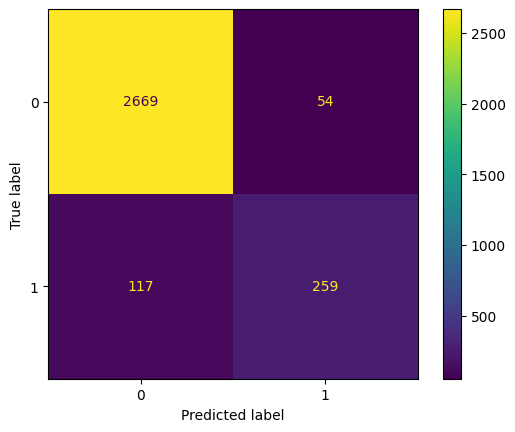

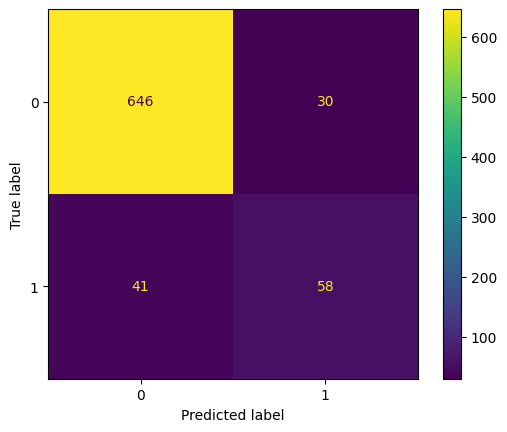

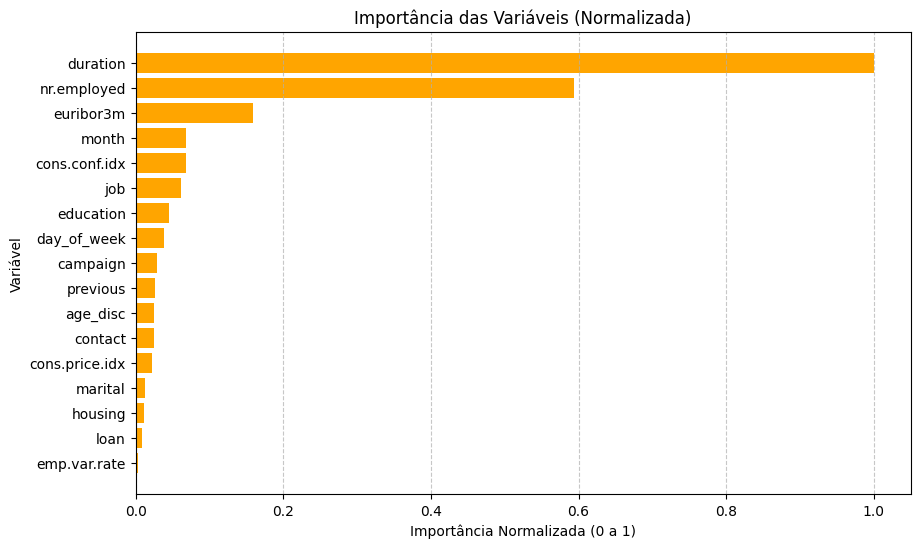

In [ ]:
algorithm = 'GB'

gb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(gb_model, new_names, algorithm, original_columns)


Best mean cross-validation score: 0.9025441069005116
Best parameters: {'learning_rate': 0.05, 'max_depth': 4}
Training error
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2721
           1       0.77      0.65      0.71       378

    accuracy                           0.93      3099
   macro avg       0.86      0.81      0.84      3099
weighted avg       0.93      0.93      0.93      3099

Test error
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       678
           1       0.64      0.47      0.54        97

    accuracy                           0.90       775
   macro avg       0.78      0.72      0.74       775
weighted avg       0.89      0.90      0.89       775



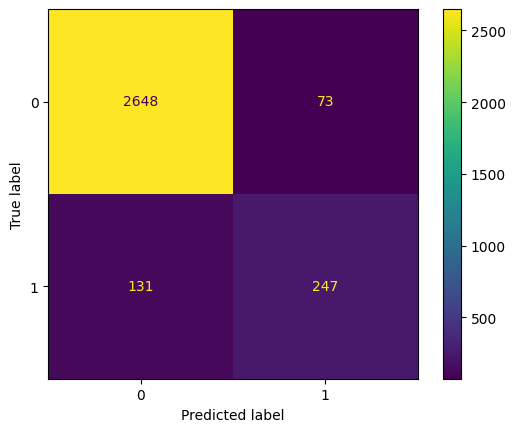

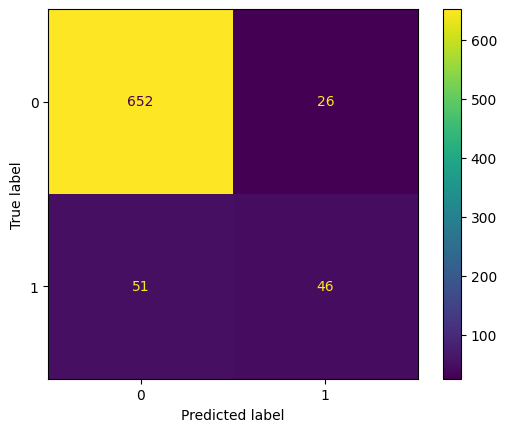

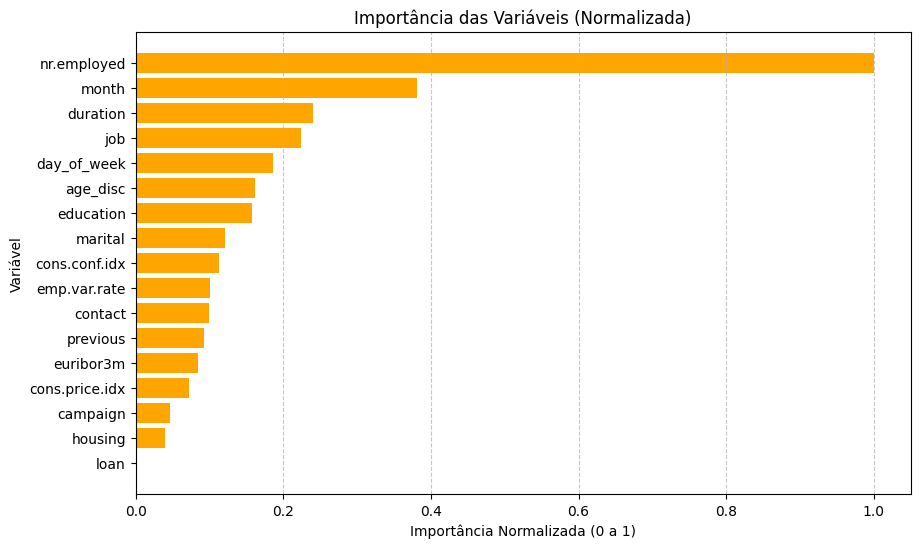

In [ ]:
algorithm = 'xgboost'

xgb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(xgb_model, new_names, algorithm, original_columns)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best mean cross-validation score: 0.9019020774611128
Best parameters: {'learning_rate': 0.05, 'max_depth': 5}
Training error
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2723
           1       0.81      0.69      0.74       376

    accuracy                           0.94      3099
   macro avg       0.88      0.83      0.86      3099
weighted avg       0.94      0.94      0.94      3099

Test error
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       676
           1       0.64      0.54      0.58        99

    accuracy                           0.90       775
   macro avg       0.79      0.75      0.76       775
weighted avg       0.90      0.90      0.90       775



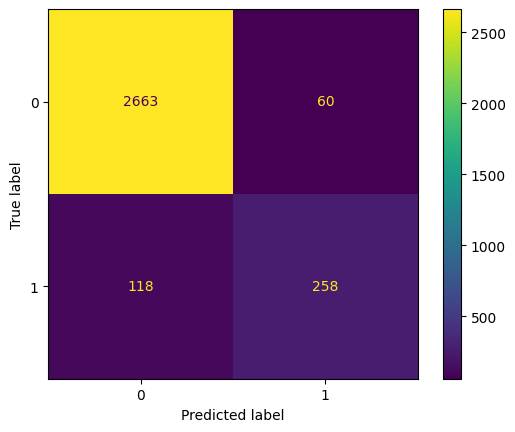

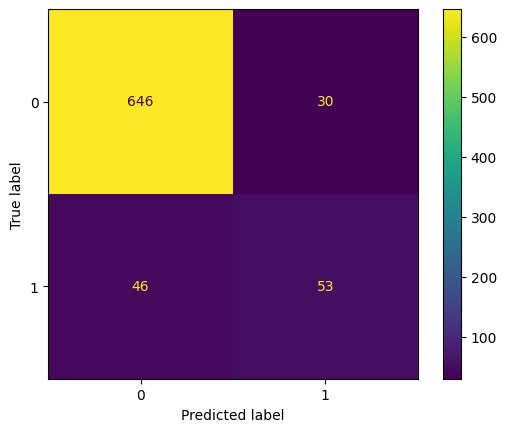

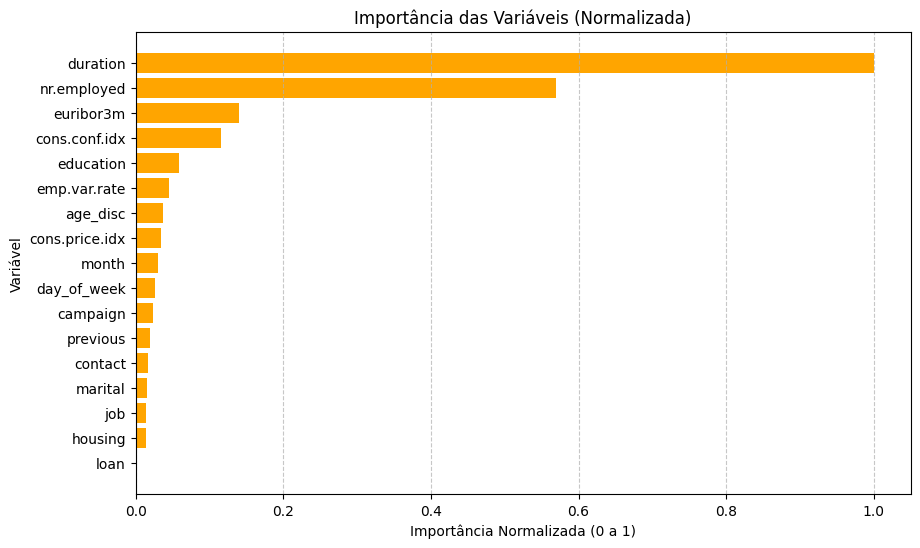

In [ ]:
algorithm = 'lightgbm'

lgb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(lgb_model, new_names, algorithm, original_columns)

#***6.2 ---------Modelos testados com 100% dos dados-----------***

Best mean cross-validation score: 0.9
Best parameters: {'n_neighbors': 24}
Training error
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27429
           1       0.70      0.34      0.45      3561

    accuracy                           0.91     30990
   macro avg       0.81      0.66      0.70     30990
weighted avg       0.89      0.91      0.89     30990

Test error
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6859
           1       0.64      0.31      0.42       889

    accuracy                           0.90      7748
   macro avg       0.78      0.65      0.68      7748
weighted avg       0.88      0.90      0.89      7748



KNeighborsClassifier(n_neighbors=24)

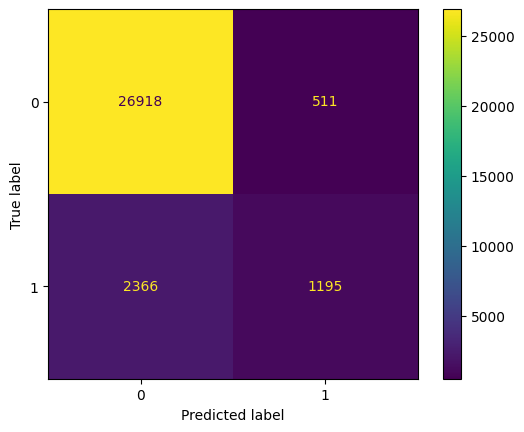

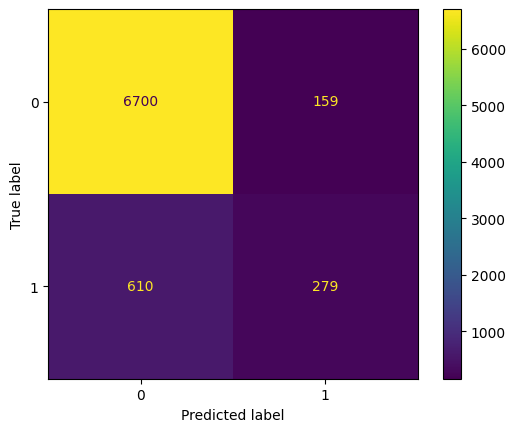

In [ ]:
algorithm = 'KNN'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

Best mean cross-validation score: 0.9046789286866732
Best parameters: {'C': 0.05}
Training error
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27429
           1       0.65      0.38      0.48      3561

    accuracy                           0.91     30990
   macro avg       0.79      0.68      0.71     30990
weighted avg       0.89      0.91      0.89     30990

Test error
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6859
           1       0.66      0.38      0.48       889

    accuracy                           0.91      7748
   macro avg       0.79      0.68      0.72      7748
weighted avg       0.89      0.91      0.90      7748



LogisticRegression(C=0.05)

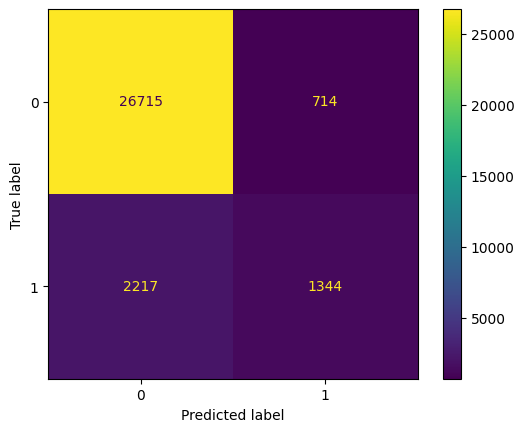

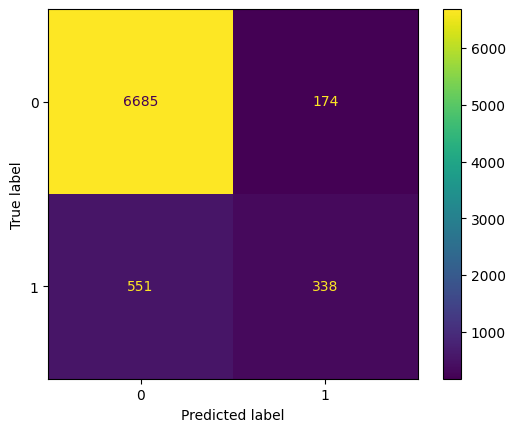

In [ ]:
algorithm = 'logistic_regression'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

Best mean cross-validation score: 0.9024524040012908
Best parameters: {'C': 5.0}
Training error
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27429
           1       0.65      0.34      0.44      3561

    accuracy                           0.90     30990
   macro avg       0.79      0.66      0.70     30990
weighted avg       0.89      0.90      0.89     30990

Test error
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6859
           1       0.63      0.33      0.44       889

    accuracy                           0.90      7748
   macro avg       0.77      0.65      0.69      7748
weighted avg       0.89      0.90      0.89      7748



SVC(C=5.0, kernel='linear')

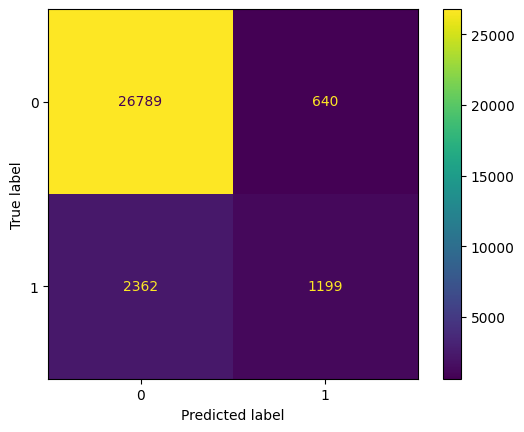

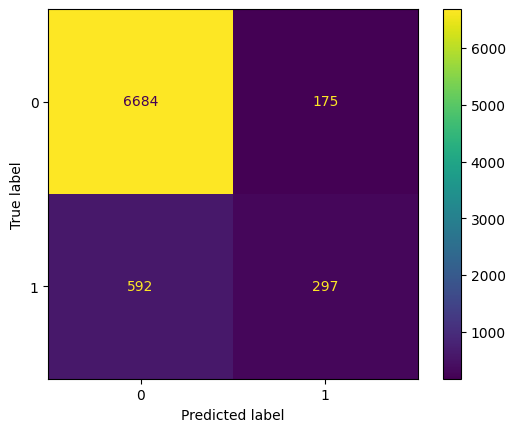

In [ ]:
algorithm = 'linear_SVC'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

Best mean cross-validation score: 0.9044207808970637
Best parameters: {'C': 0.3, 'gamma': 0.1}
Training error
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27429
           1       0.73      0.41      0.52      3561

    accuracy                           0.91     30990
   macro avg       0.83      0.69      0.74     30990
weighted avg       0.90      0.91      0.90     30990

Test error
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6859
           1       0.66      0.37      0.47       889

    accuracy                           0.91      7748
   macro avg       0.79      0.67      0.71      7748
weighted avg       0.89      0.91      0.89      7748



SVC(C=0.3, gamma=0.1)

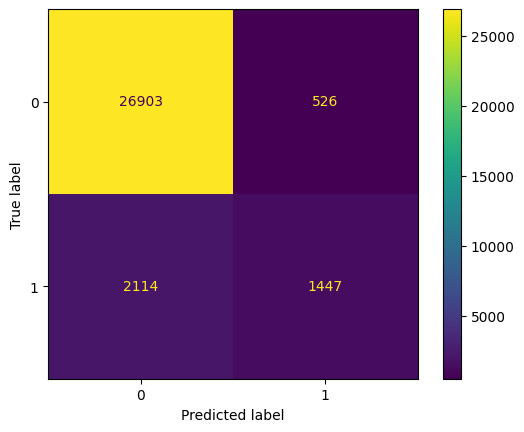

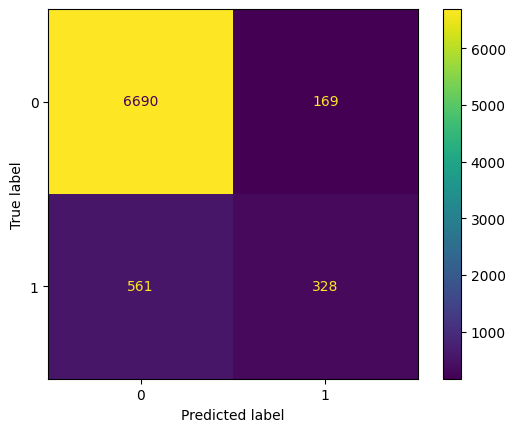

In [ ]:
algorithm = 'rbf_SVC'

apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

Best mean cross-validation score: 0.9066795740561471
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 6}
Training error
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     27429
           1       0.60      0.59      0.59      3561

    accuracy                           0.91     30990
   macro avg       0.77      0.77      0.77     30990
weighted avg       0.91      0.91      0.91     30990

Test error
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6859
           1       0.59      0.59      0.59       889

    accuracy                           0.91      7748
   macro avg       0.77      0.77      0.77      7748
weighted avg       0.91      0.91      0.91      7748



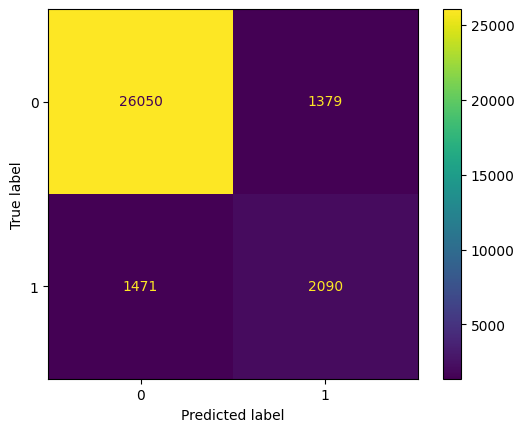

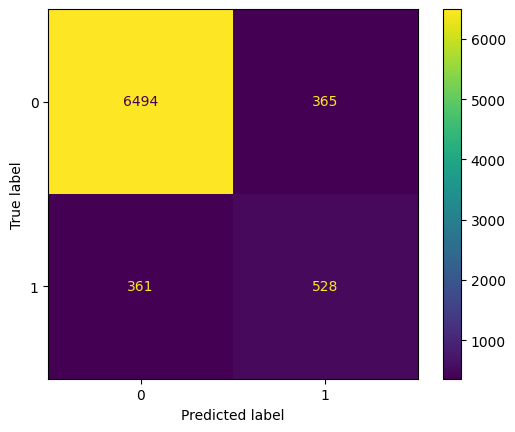

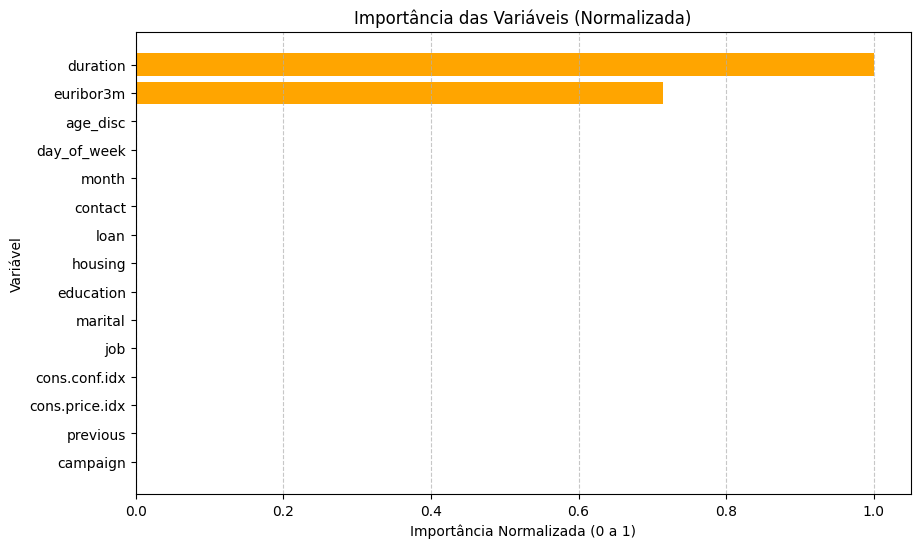

In [ ]:
algorithm = 'DT'

dt_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(dt_model, new_names, algorithm, original_columns)

Best mean cross-validation score: 0.8866085834140044
Best parameters: {'max_depth': 6, 'max_leaf_nodes': 10, 'n_estimators': 100}
Training error
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27429
           1       0.87      0.02      0.04      3561

    accuracy                           0.89     30990
   macro avg       0.88      0.51      0.49     30990
weighted avg       0.88      0.89      0.84     30990

Test error
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6859
           1       0.88      0.02      0.03       889

    accuracy                           0.89      7748
   macro avg       0.88      0.51      0.49      7748
weighted avg       0.89      0.89      0.84      7748



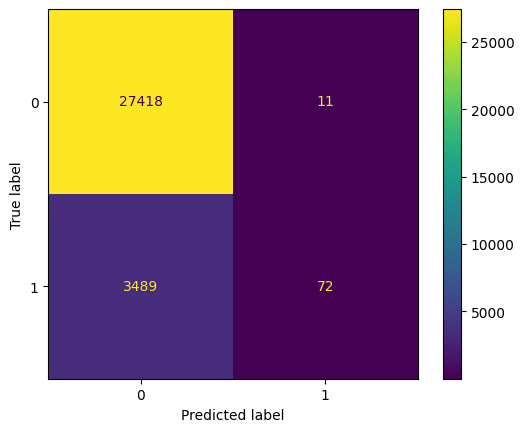

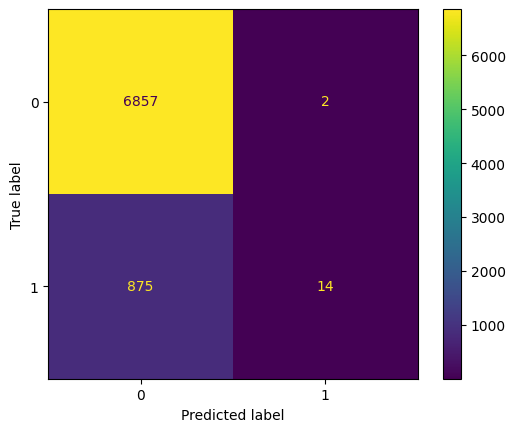

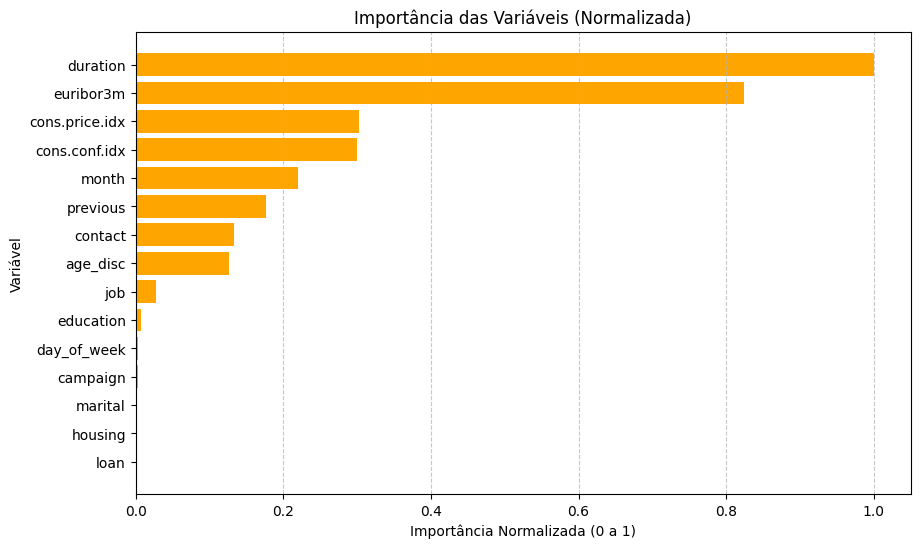

In [ ]:
algorithm = 'RF'

rf_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(rf_model, new_names, algorithm, original_columns)

Best mean cross-validation score: 0.9120038722168442
Best parameters: {'learning_rate': 0.05, 'max_depth': 4}
Training error
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     27429
           1       0.68      0.58      0.62      3561

    accuracy                           0.92     30990
   macro avg       0.81      0.77      0.79     30990
weighted avg       0.91      0.92      0.92     30990

Test error
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6859
           1       0.65      0.56      0.60       889

    accuracy                           0.91      7748
   macro avg       0.79      0.76      0.78      7748
weighted avg       0.91      0.91      0.91      7748



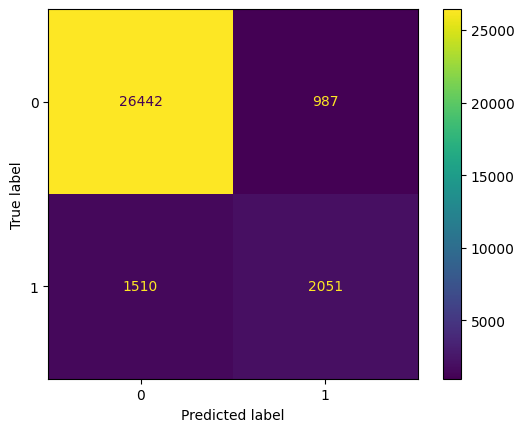

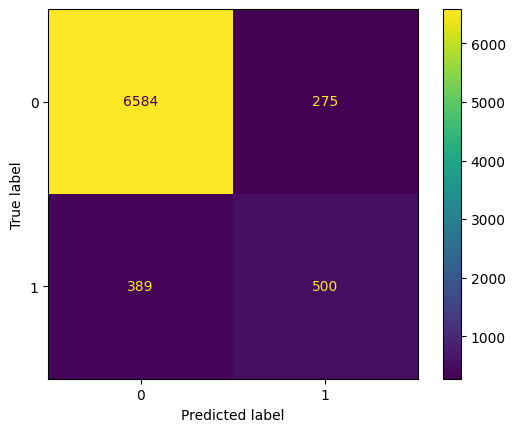

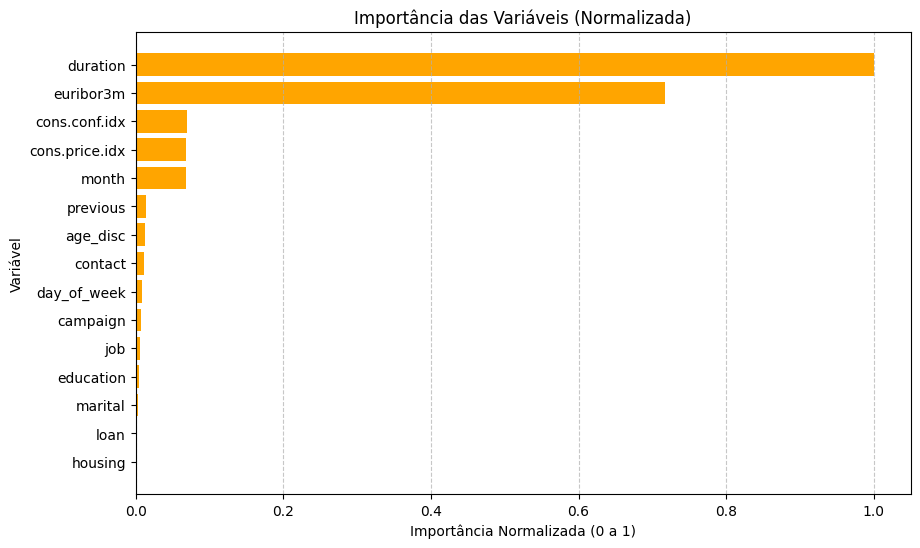

In [ ]:
algorithm = 'GB'

gb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(gb_model, new_names, algorithm, original_columns)

Best mean cross-validation score: 0.9129073894804776
Best parameters: {'learning_rate': 0.05, 'max_depth': 5}
Training error
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     27429
           1       0.67      0.58      0.62      3561

    accuracy                           0.92     30990
   macro avg       0.81      0.77      0.79     30990
weighted avg       0.91      0.92      0.92     30990

Test error
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6859
           1       0.65      0.56      0.60       889

    accuracy                           0.92      7748
   macro avg       0.80      0.76      0.78      7748
weighted avg       0.91      0.92      0.91      7748



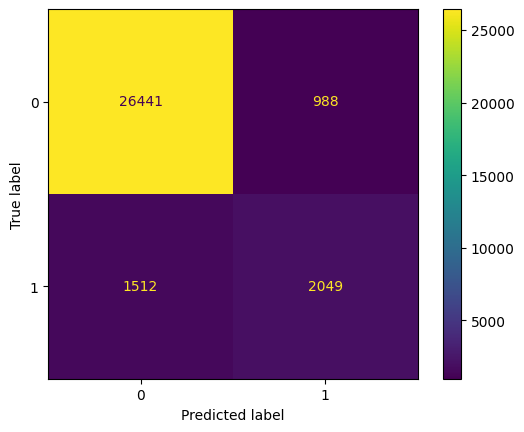

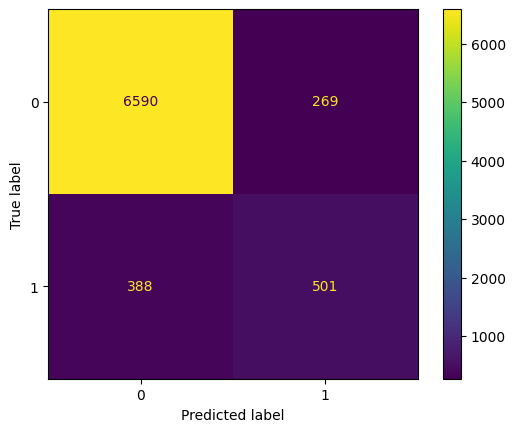

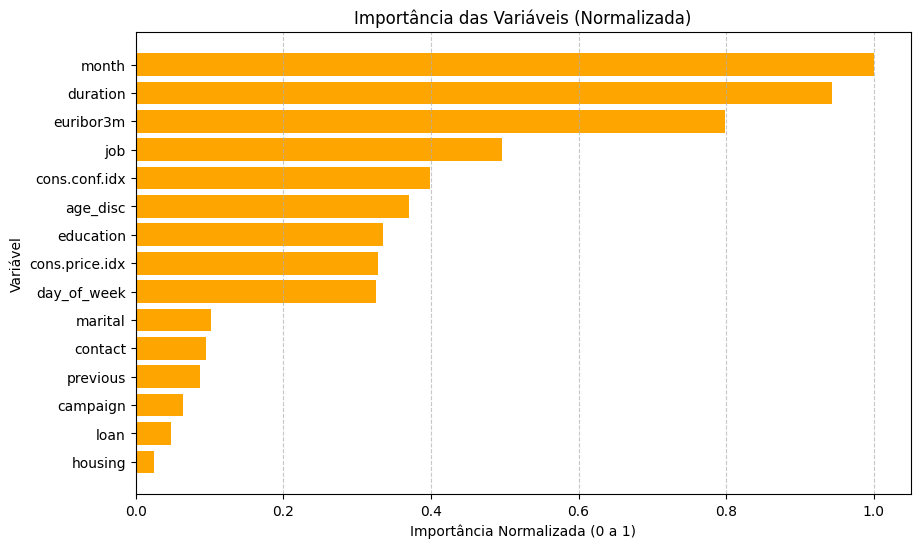

In [ ]:
algorithm = 'xgboost'

xgb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(xgb_model, new_names, algorithm, original_columns)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best mean cross-validation score: 0.9122942884801548
Best parameters: {'learning_rate': 0.05, 'max_depth': 6}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training error
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     27429
           1       0.69      0.60      0.64      3561

    accuracy                           0.92     30990
   macro avg       0.82      0.78      0.80     30990
weighted avg       0.92      0.92      0.92     30990

Test error
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6859
           1       0.64      0.58      0.61       889

    accuracy                           0.91      7748
   macro avg       0.79      0.77      0.78      7748
weighted avg       0.91      0.91      0.91      7748



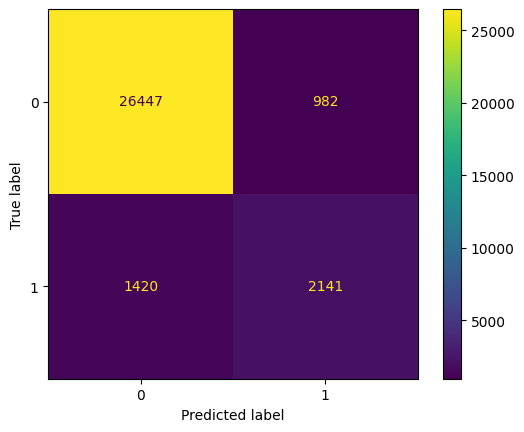

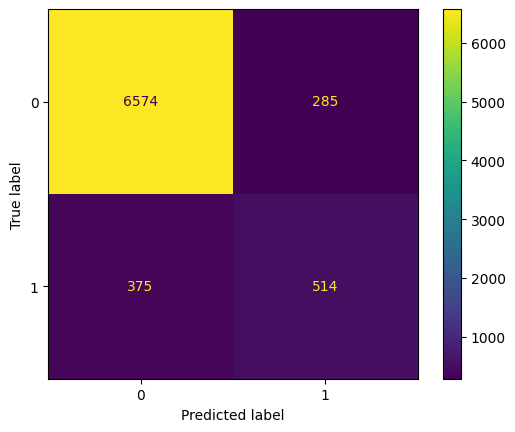

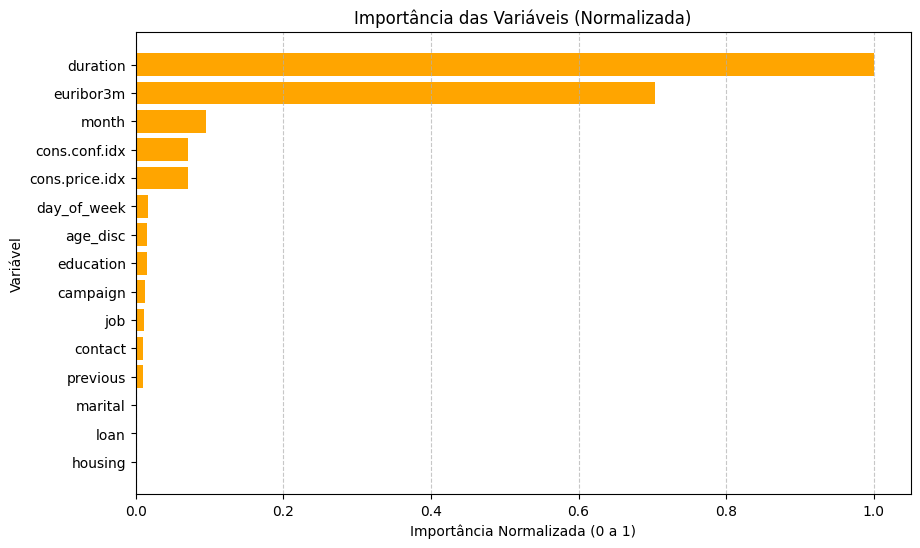

In [ ]:
algorithm = 'lightgbm'

lgb_model = apply_model(algorithm, problem_type, X_train, X_test, y_train, y_test)

variables_importance(lgb_model, new_names, algorithm, original_columns)